In [398]:
import pandas as pd 
from pandas_datareader import oecd 
import pandas_datareader.data as web
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance
import numpy as np
import os
import investpy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## I. Récupération des données

In [558]:
start = datetime.datetime(1990, 1, 1) # Date de début dans les dataframes
end = datetime.datetime(2022, 1, 27) # Date de fin 

In [36]:
ForexSymbols = ["GBPJPY=X","GBPUSD=X","EURUSD=X","JPYUSD=X","CADUSD=X","SEKUSD=X","CHFUSD=X","USDBRL=X","AUDUSD=X","CADUSD=X"]

In [37]:
EquitySymbols = ["F/N","F/S","D/S","N/S","O/S","T/S","SMI/S","S/B","A/S","T/S"]

### a) Spots des paires du Forex (via Yahoo Finance)

In [308]:
for i in range(len(ForexSymbols)):
    print(ForexSymbols[i][:-2])

GBPJPY
GBPUSD
EURUSD
JPYUSD
CADUSD
SEKUSD
CHFUSD
USDBRL
AUDUSD
CADUSD


In [559]:
ForexDF = []
for symbol in ForexSymbols:
    print(symbol)
    ForexDF.append(web.DataReader(symbol, "yahoo", start, end)["Close"])

GBPJPY=X
GBPUSD=X
EURUSD=X
JPYUSD=X
CADUSD=X
SEKUSD=X
CHFUSD=X
USDBRL=X
AUDUSD=X
CADUSD=X


### b) Equities (via Yahoo Finance)

In [513]:
EquityDF = []
for Symbol in EquitySymbols:
    #try:
        if Symbol == "F/N":
            EquityDF.append(yfinance.download(["^FTSE","^N225"],start,end,interval="1d")["Close"])
            #EquityDF.append(web.DataReader(["^FTSE","^N225"], "yahoo", start, end)["Close"])
        elif Symbol == "F/S":
            EquityDF.append(yfinance.download(["^FTSE","^GSPC"],start,end,interval="1d")["Close"])
            #EquityDF.append(web.DataReader(["^FTSE","^GSPC"], "yahoo", start, end)["Close"])
        elif Symbol == "D/S":
            EquityDF.append(yfinance.download(["^GDAXI","^GSPC"],start,end,interval="1d")["Close"])
            #EquityDF.append(web.DataReader(["","^GSPC"], "yahoo", start, end)["Close"])
        elif Symbol == "N/S":
            EquityDF.append(yfinance.download(["^N225","^GSPC"],start,end,interval="1d")["Close"])
            #EquityDF.append(web.DataReader(["^N225","^GSPC"], "yahoo", start, end)["Close"])
        elif Symbol == "O/S":
            EquityDF.append(yfinance.download(["^OMXS30ETHICPI","^GSPC"],start,end,interval="1d")["Close"])
            #EquityDF.append(web.DataReader(["^OMXS30ETHICPI","^GSPC"], "yahoo", start, end)["Close"])
        elif Symbol == "T/S":
            EquityDF.append(yfinance.download(["^GSPTSE","^GSPC"],start,end,interval="1d")["Close"])
            #EquityDF.append(web.DataReader(["^GSPTSE","^GSPC"], "yahoo", start, end)["Close"])
        elif Symbol == "SMI/S":
            EquityDF.append(yfinance.download(["^SSMI","^GSPC"],start,end,interval="1d")["Close"])
            #EquityDF.append(web.DataReader(["^SSMI","^GSPC"], "yahoo", start, end)["Close"])
        elif Symbol == "S/B":
            EquityDF.append(yfinance.download(["^GSPC","^BVSP"],start,end,interval="1d")["Close"])
            #EquityDF.append(web.DataReader(["^GSPC","^BVSP"], "yahoo", start, end)["Close"])
        elif Symbol == "A/S":
            EquityDF.append(yfinance.download(["^AXJO","^GSPC"],start,end,interval="1d")["Close"])
            #EquityDF.append(web.DataReader(["^AXJO","^GSPC"], "yahoo", start, end)["Close"])
        elif Symbol == "T/S":
            EquityDF.append(yfinance.download(["^GSPTSE","^GSPC"],start,end,interval="1d")["Close"])
            #EquityDF.append(web.DataReader(["^GSPTSE","^GSPC"], "yahoo", start, end)["Close"])
    #except: 
        #pass


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [561]:
for i in range(len(EquityDF)):
     EquityDF[i]["Ratio"]=EquityDF[i][EquityDF[i].columns[0]]/EquityDF[i][EquityDF[i].columns[1]]
     EquityDF[i]=EquityDF[i]["Ratio"]
     print(len(EquityDF[i]))

AttributeError: 'Series' object has no attribute 'columns'

### c) Ratios des rendements obligataires (via Investing)

In [ ]:
BondSymbols=["BR10YT=XX","CA10YT=RR","JP10YT=XX","GB10YT=RR","CH10YT=RR","US10YT=X","AU10YT=RR","DE10YT=RR"]
BondData=[]
for i in range(len(BondSymbols)):
    print(BondSymbols[i])
    se = investpy.search_quotes(text=BondSymbols[i],products=["bonds"],
                                        n_results=1)
    BondData.append(se.retrieve_historical_data(from_date='01/01/1990', to_date='01/01/2020')["Close"].dropna(axis=0))
    

BondDF=[0]*10
BondDF[0]=BondData[3]/BondData[2]
BondDF[1]=BondData[3]/BondData[-3]
BondDF[2]=BondData[-1]/BondData[-3]
BondDF[3]=BondData[2]/BondData[-3]
BondDF[4]=BondData[1]/BondData[-3]
BondDF[5]=investpy.search_quotes(text=BondSymbols[i],products=["bonds"],
                                        n_results=1).retrieve_historical_data(from_date='01/01/1990', to_date='01/01/2020')["Close"]
BondDF[6]=BondData[4]/BondData[-3]
BondDF[7]=BondData[-3]/BondData[0]
BondDF[8]=BondData[-2]/BondData[-3]
BondDF[9]=BondData[1]/BondData[-3]

for i in range(len(BondDF)):
    
    BondDF[i].replace([np.inf, -np.inf], np.nan).dropna(axis=0,inplace=True)

### d) Matières premières

In [ ]:
Gold = investpy.search_quotes(text="Gold",n_results=1).retrieve_historical_data(from_date='01/01/1990', to_date='01/01/2022')["Close"].dropna(axis=0)
WTI = investpy.search_quotes(text="wti",n_results=1).retrieve_historical_data(from_date='01/01/1990', to_date='01/01/2022')["Close"].dropna(axis=0)

## II. Premières observations 

GBPJPY=X


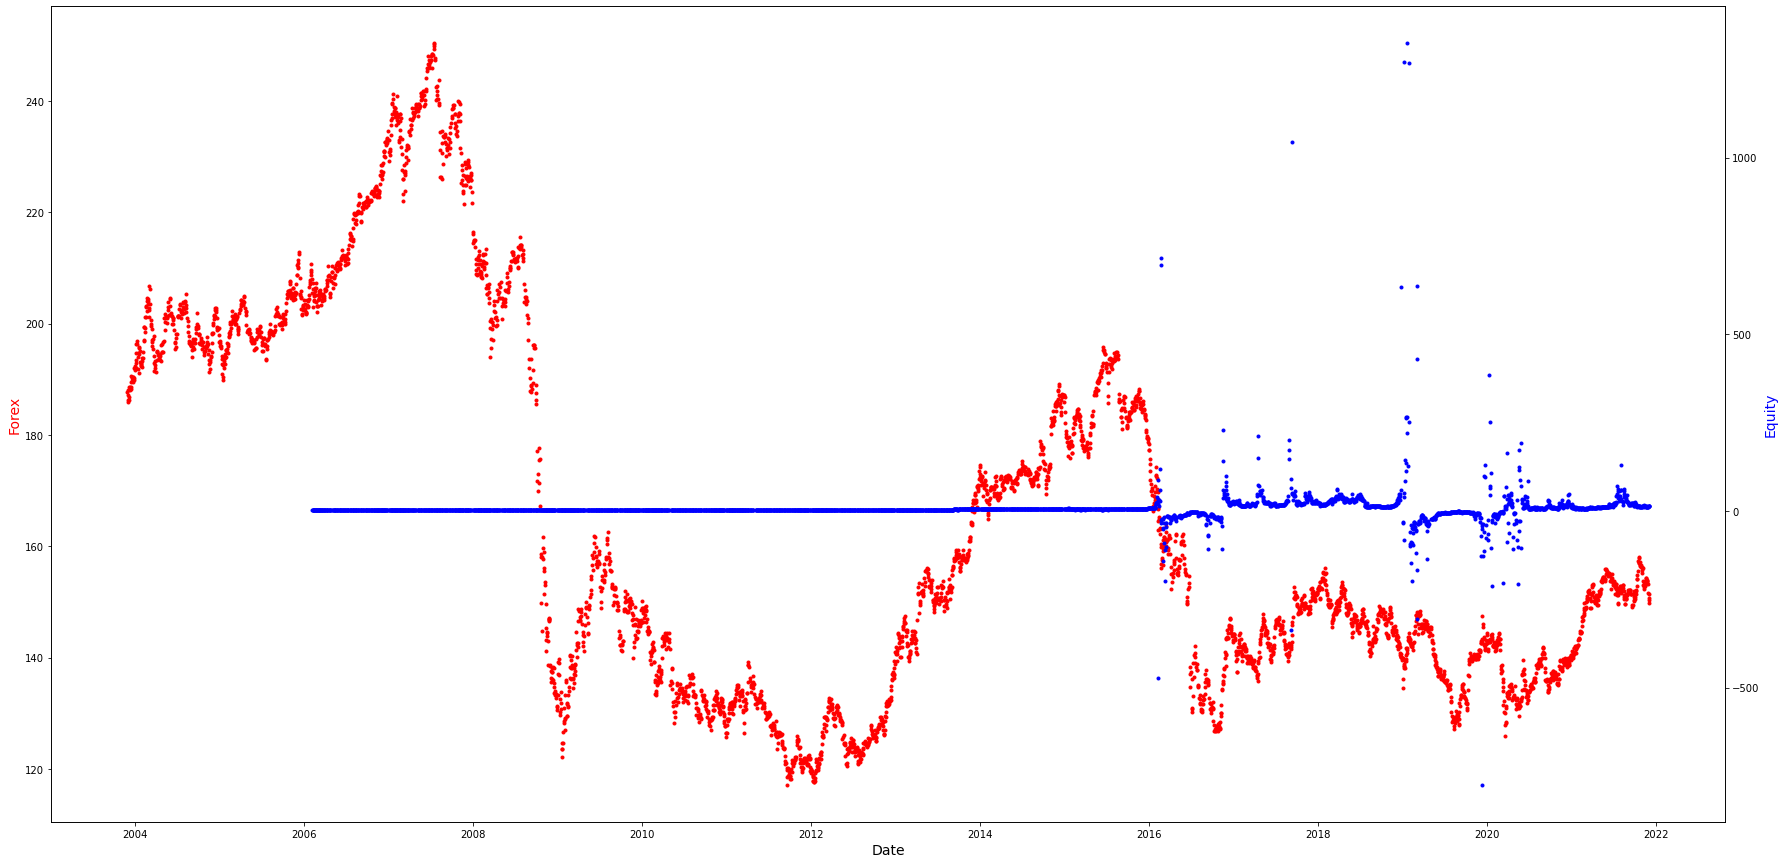

GBPUSD=X


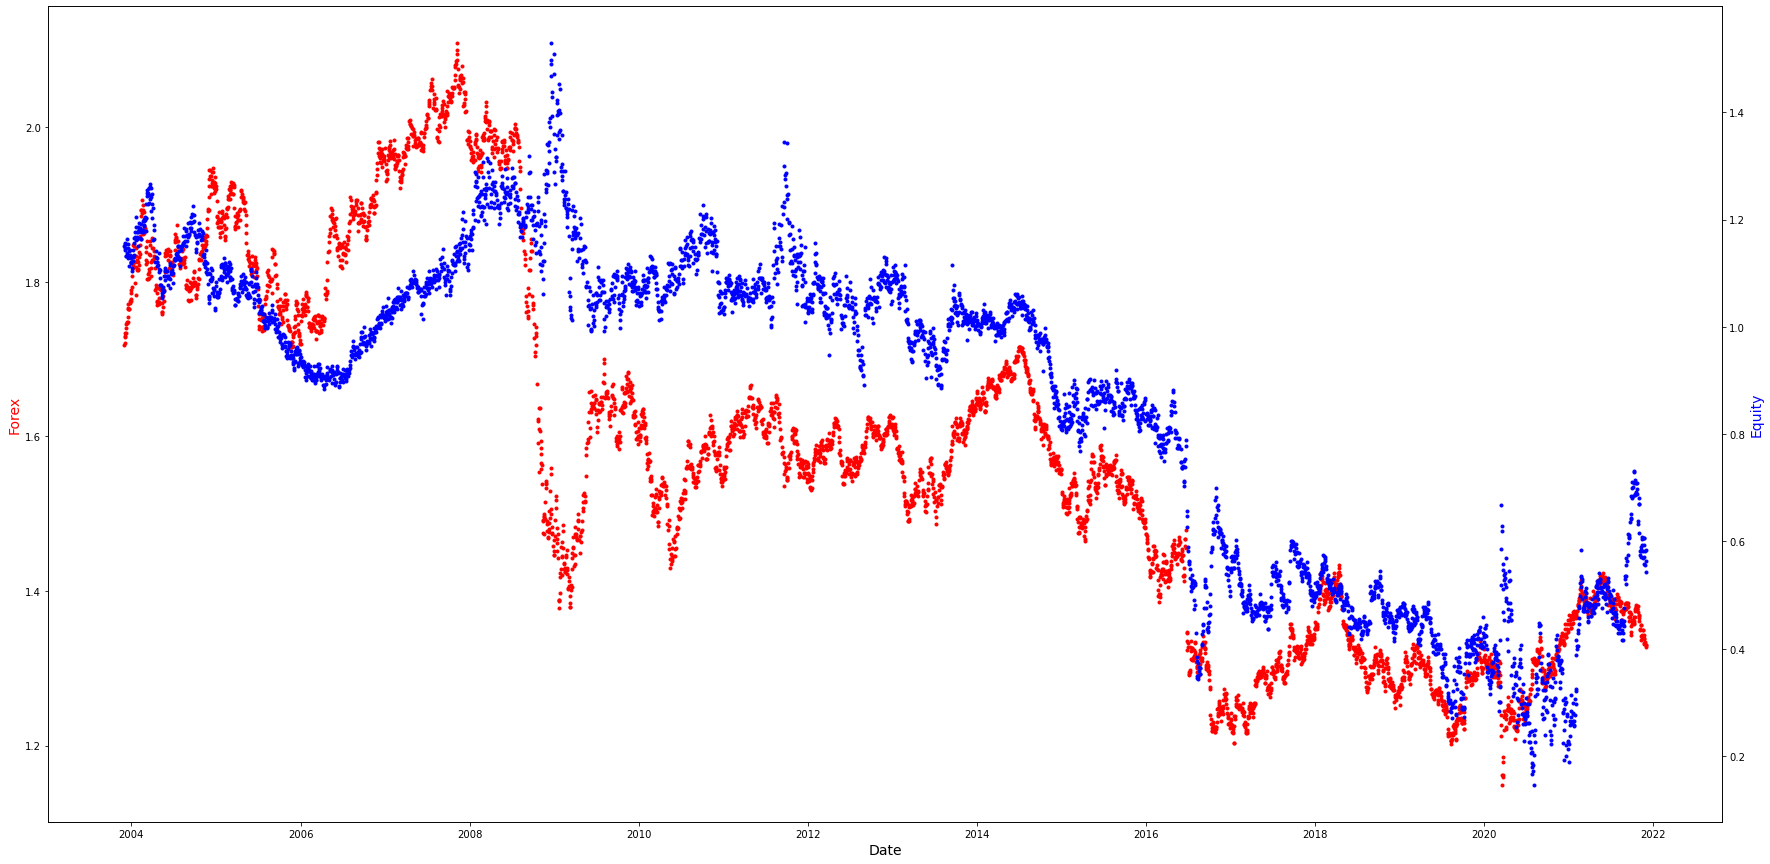

EURUSD=X


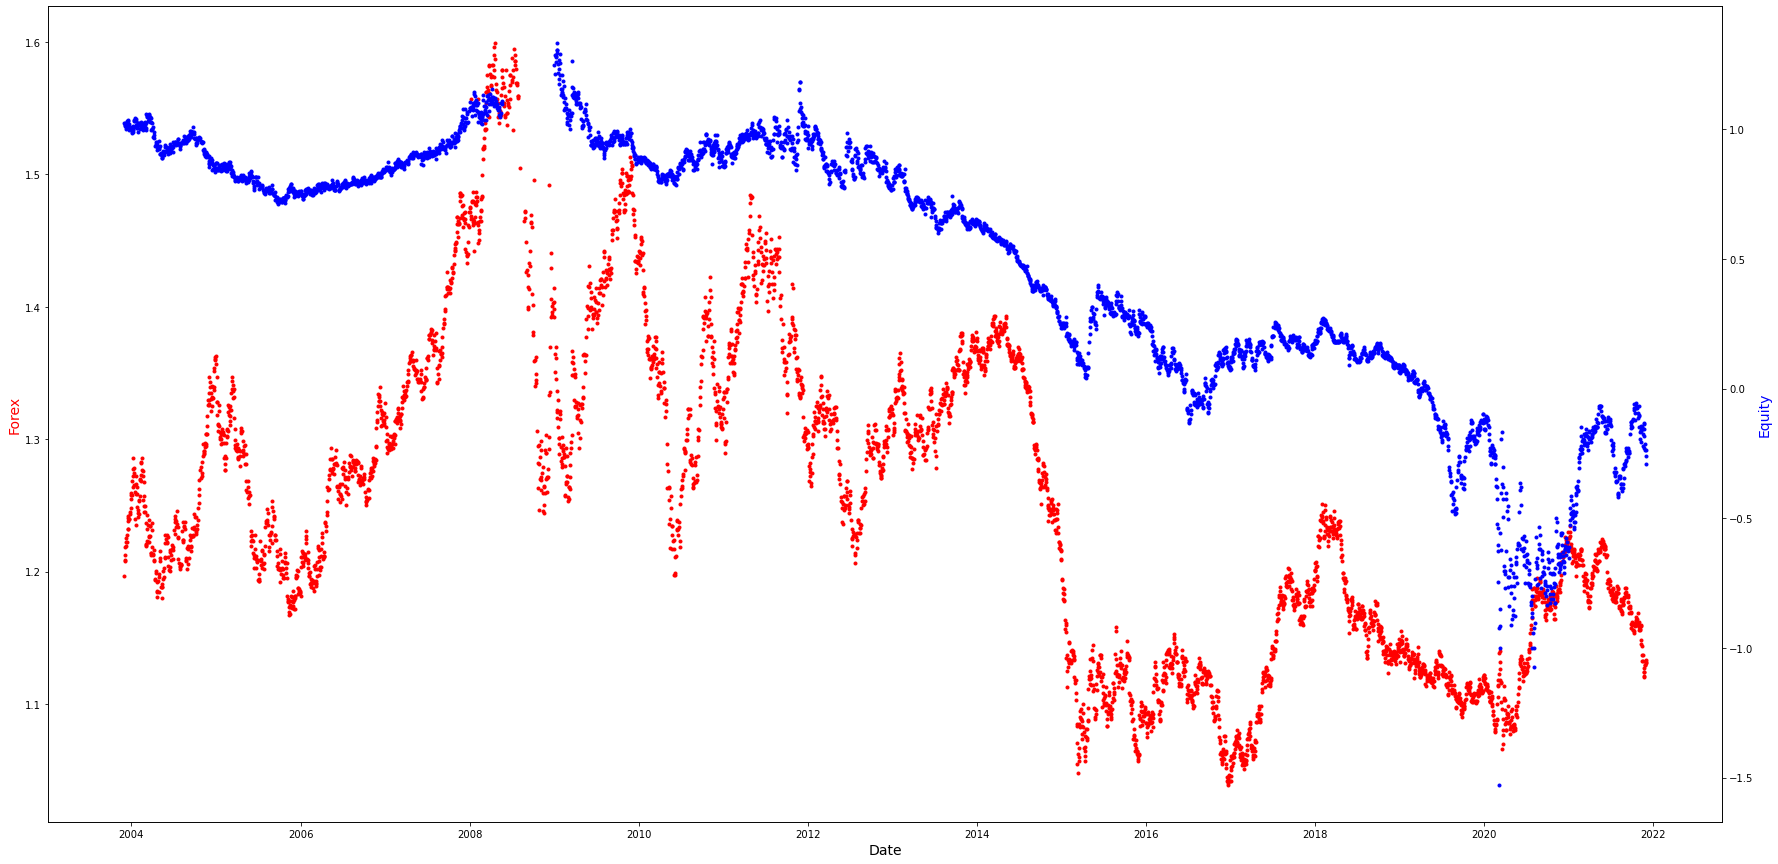

JPYUSD=X


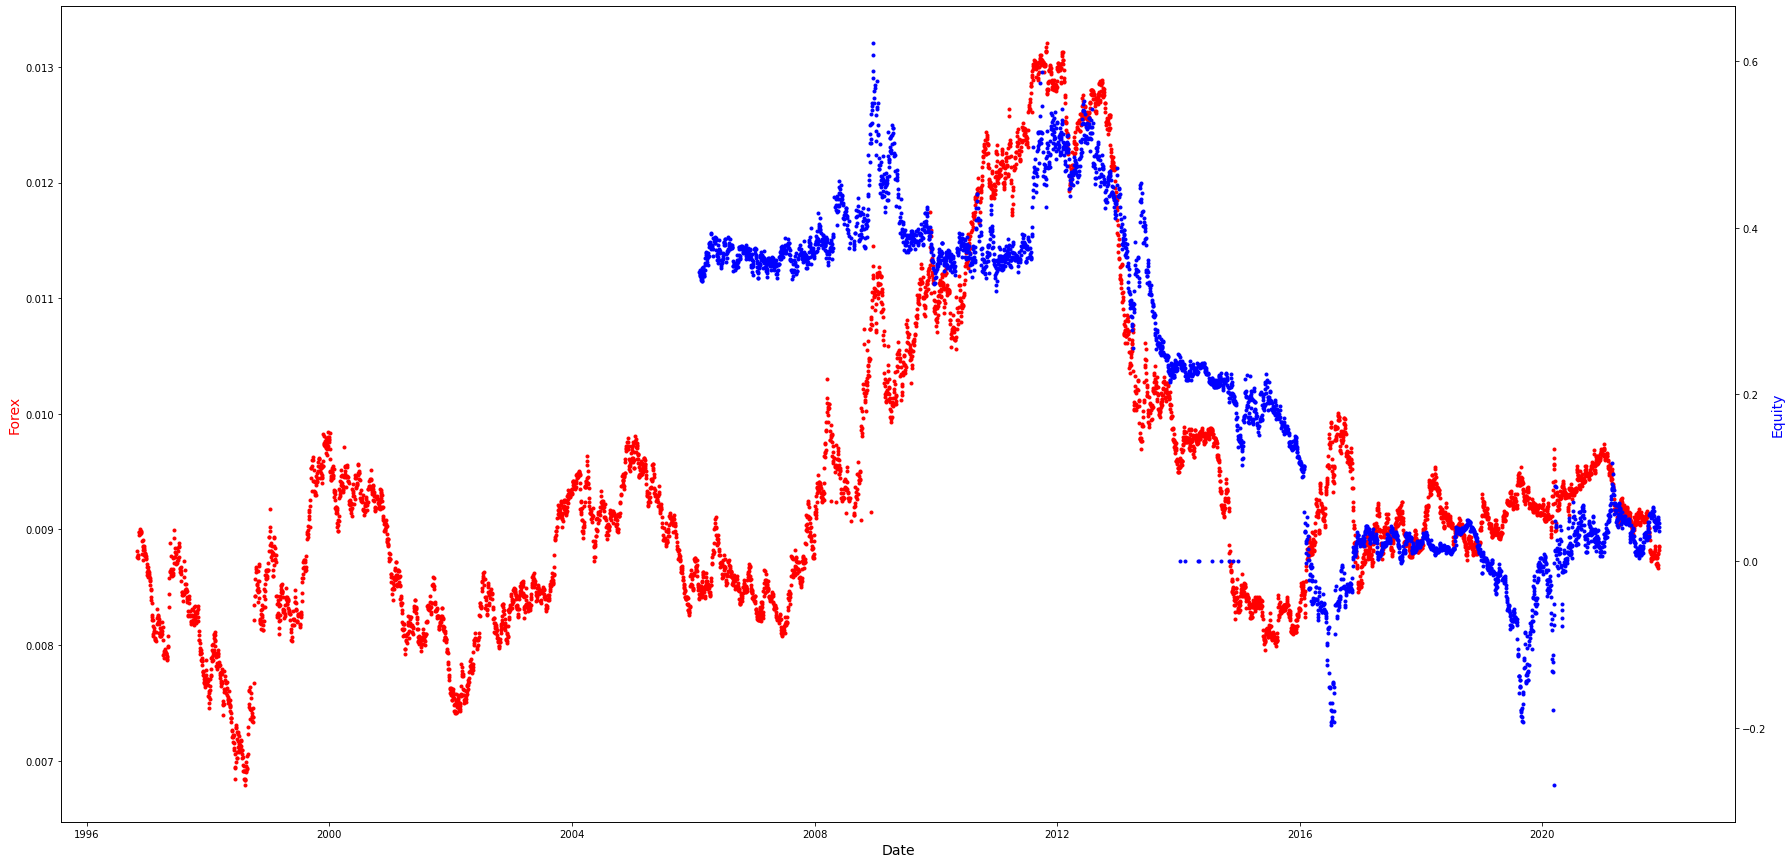

CADUSD=X


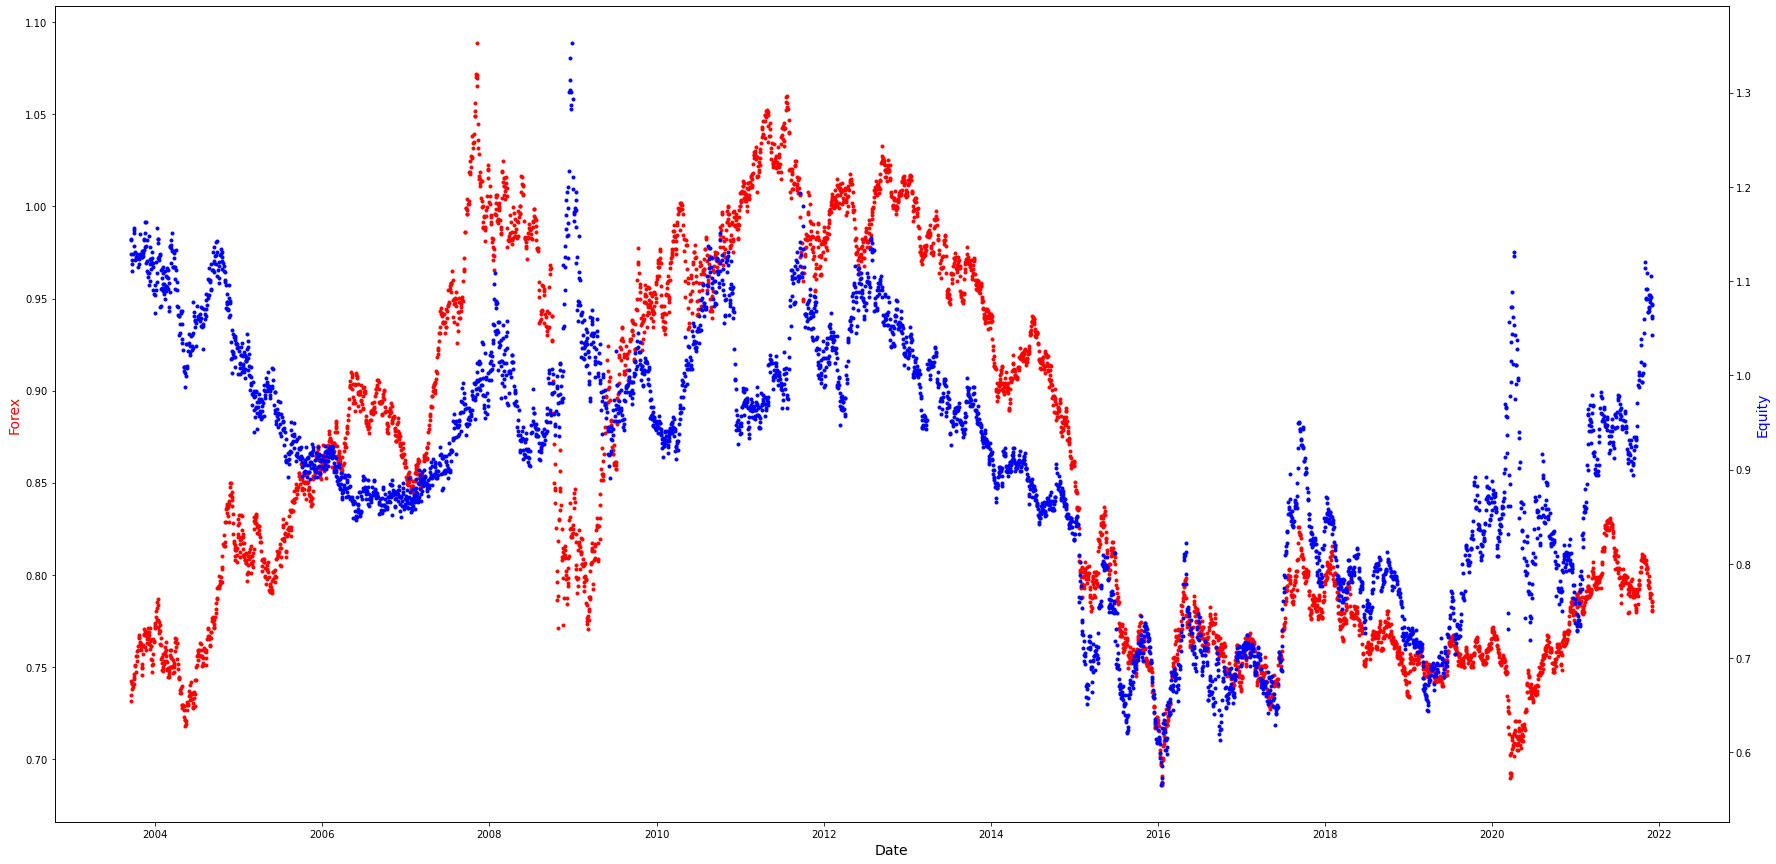

SEKUSD=X


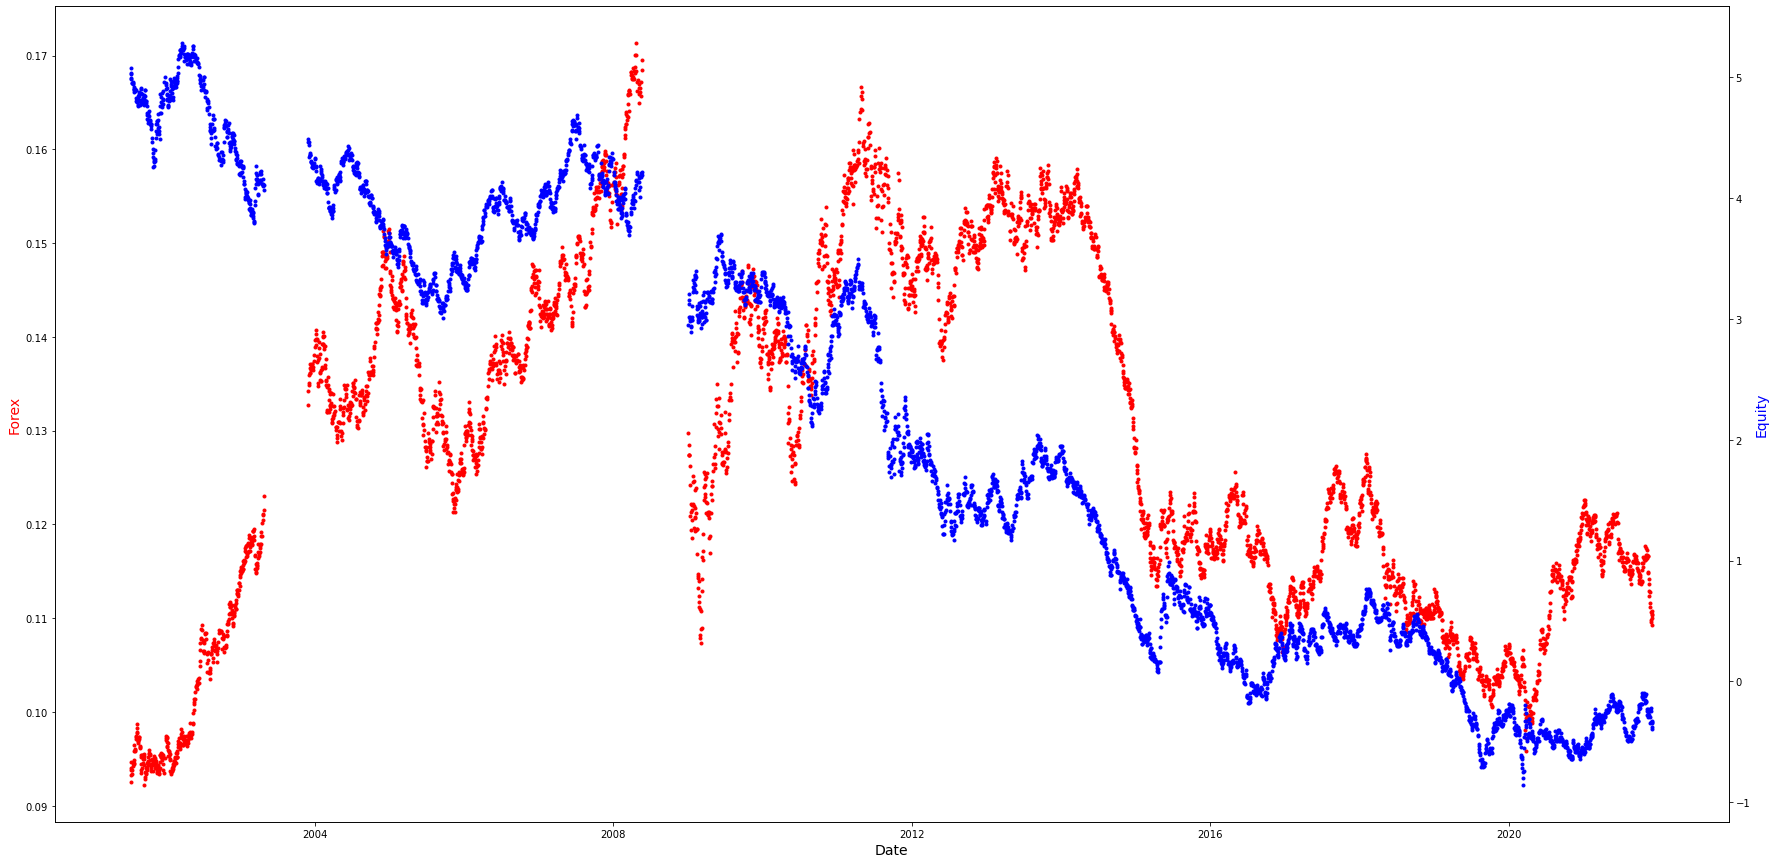

CHFUSD=X


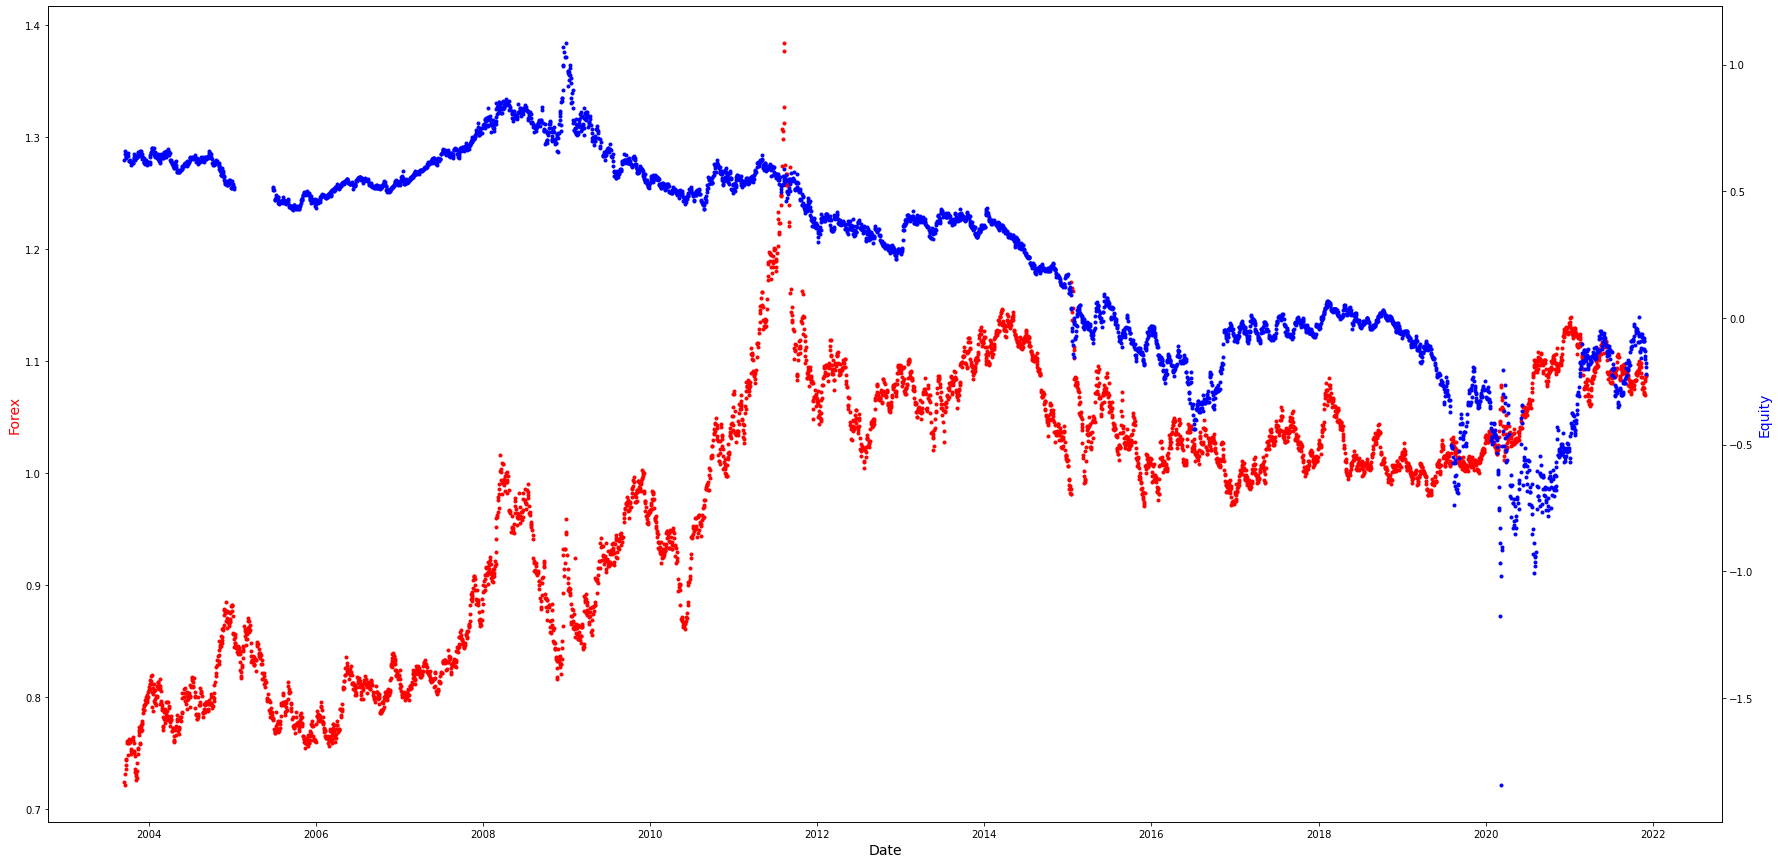

USDBRL=X


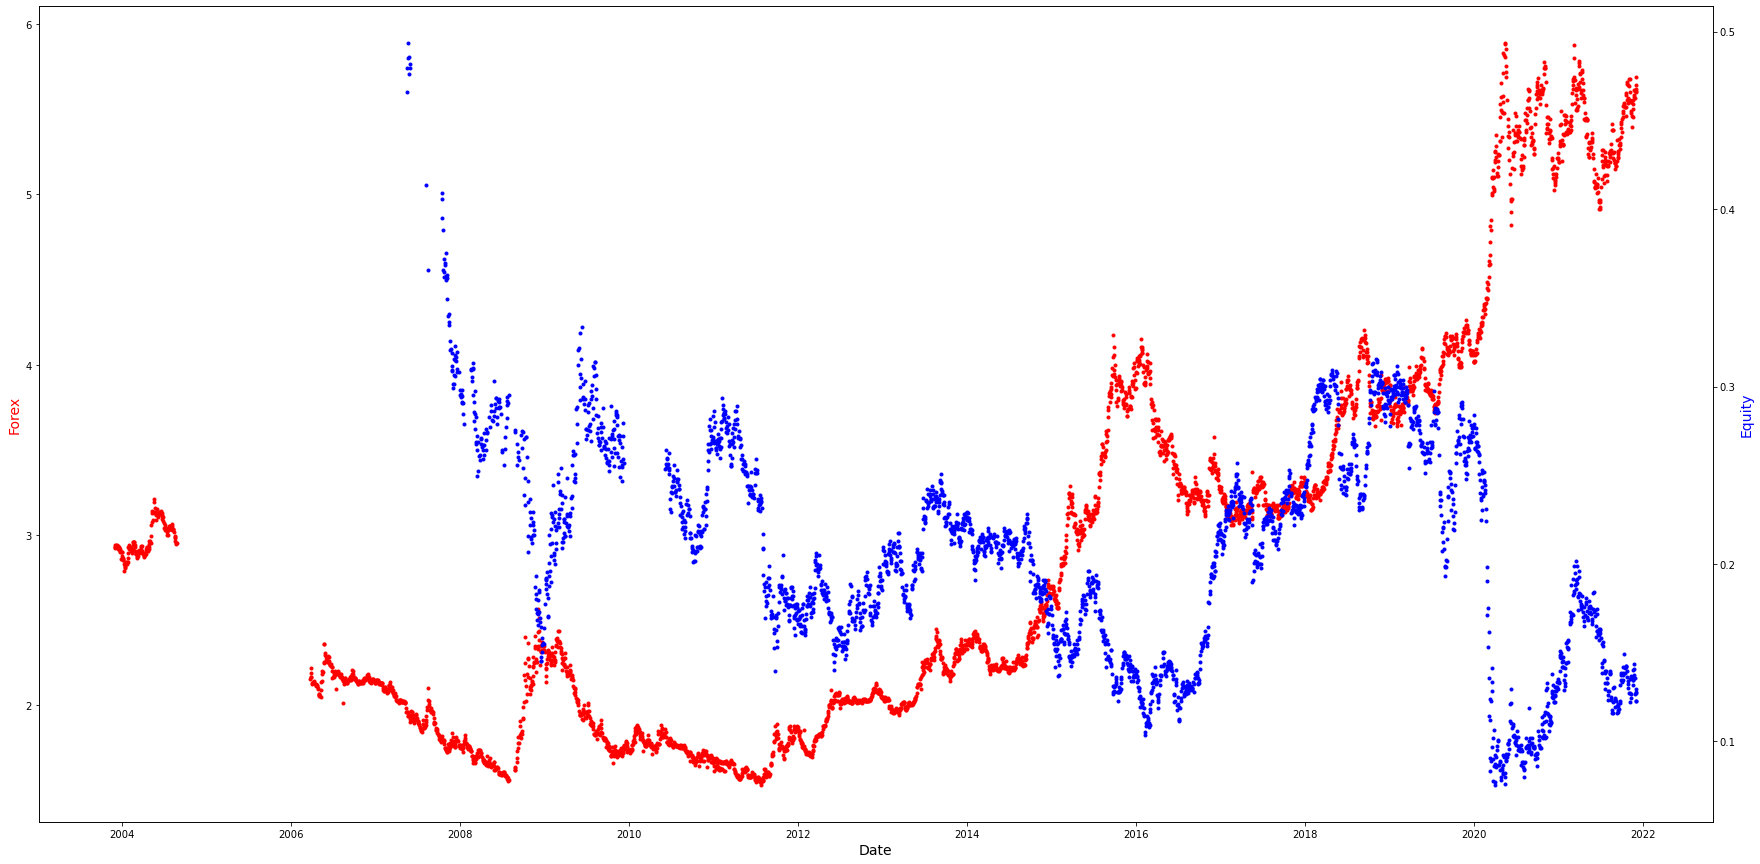

AUDUSD=X


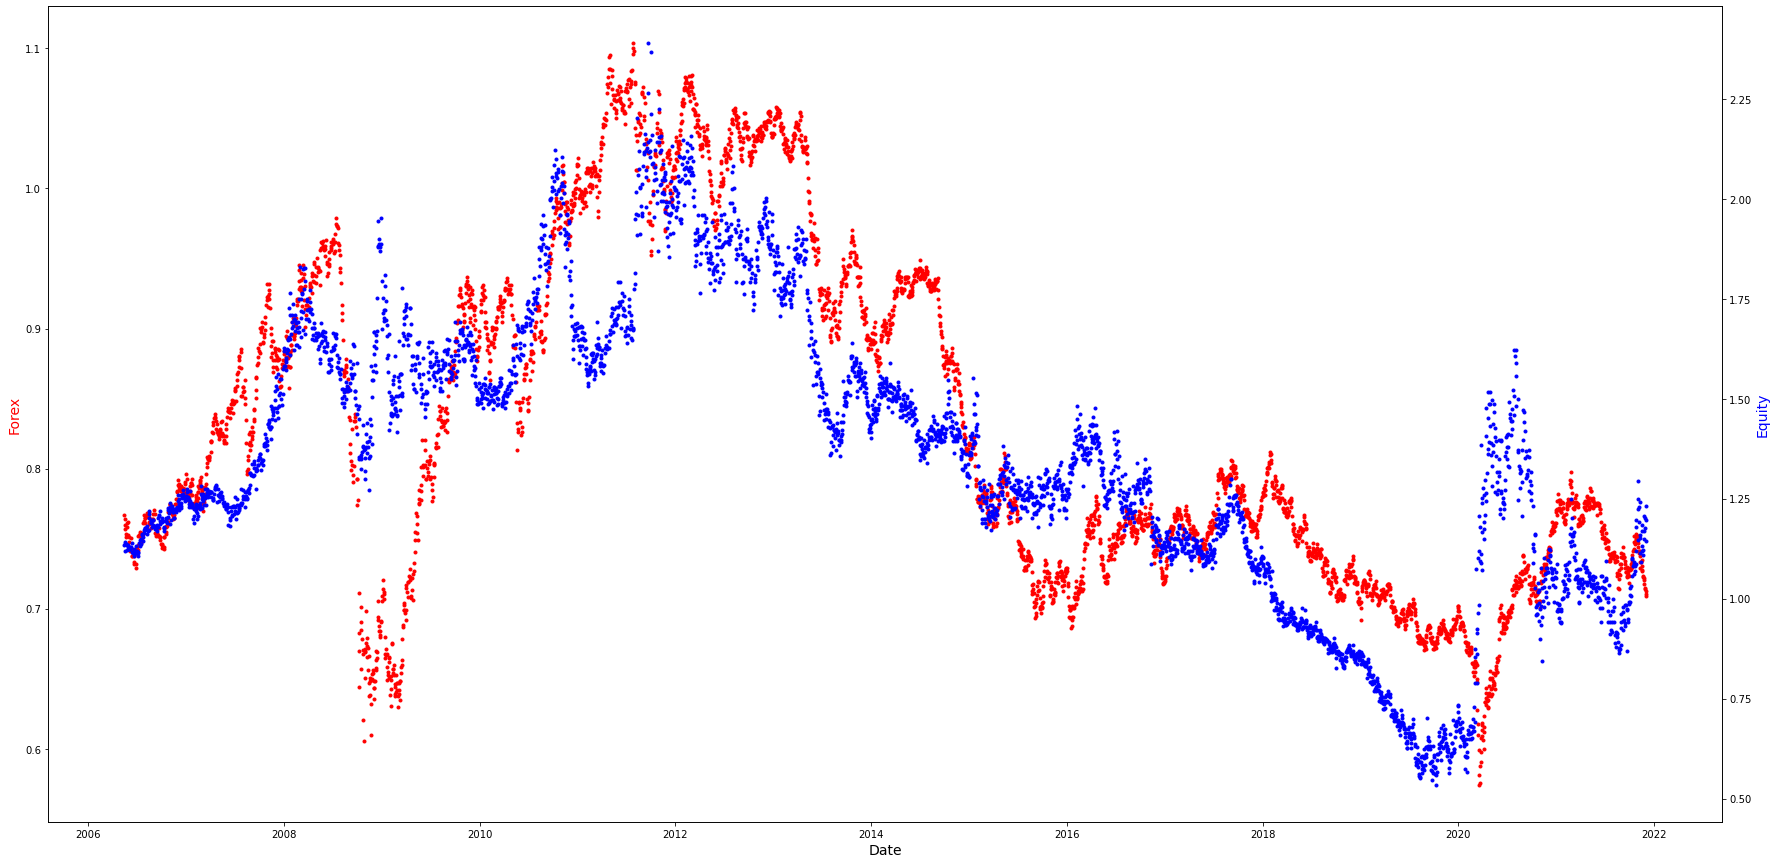

CADUSD=X


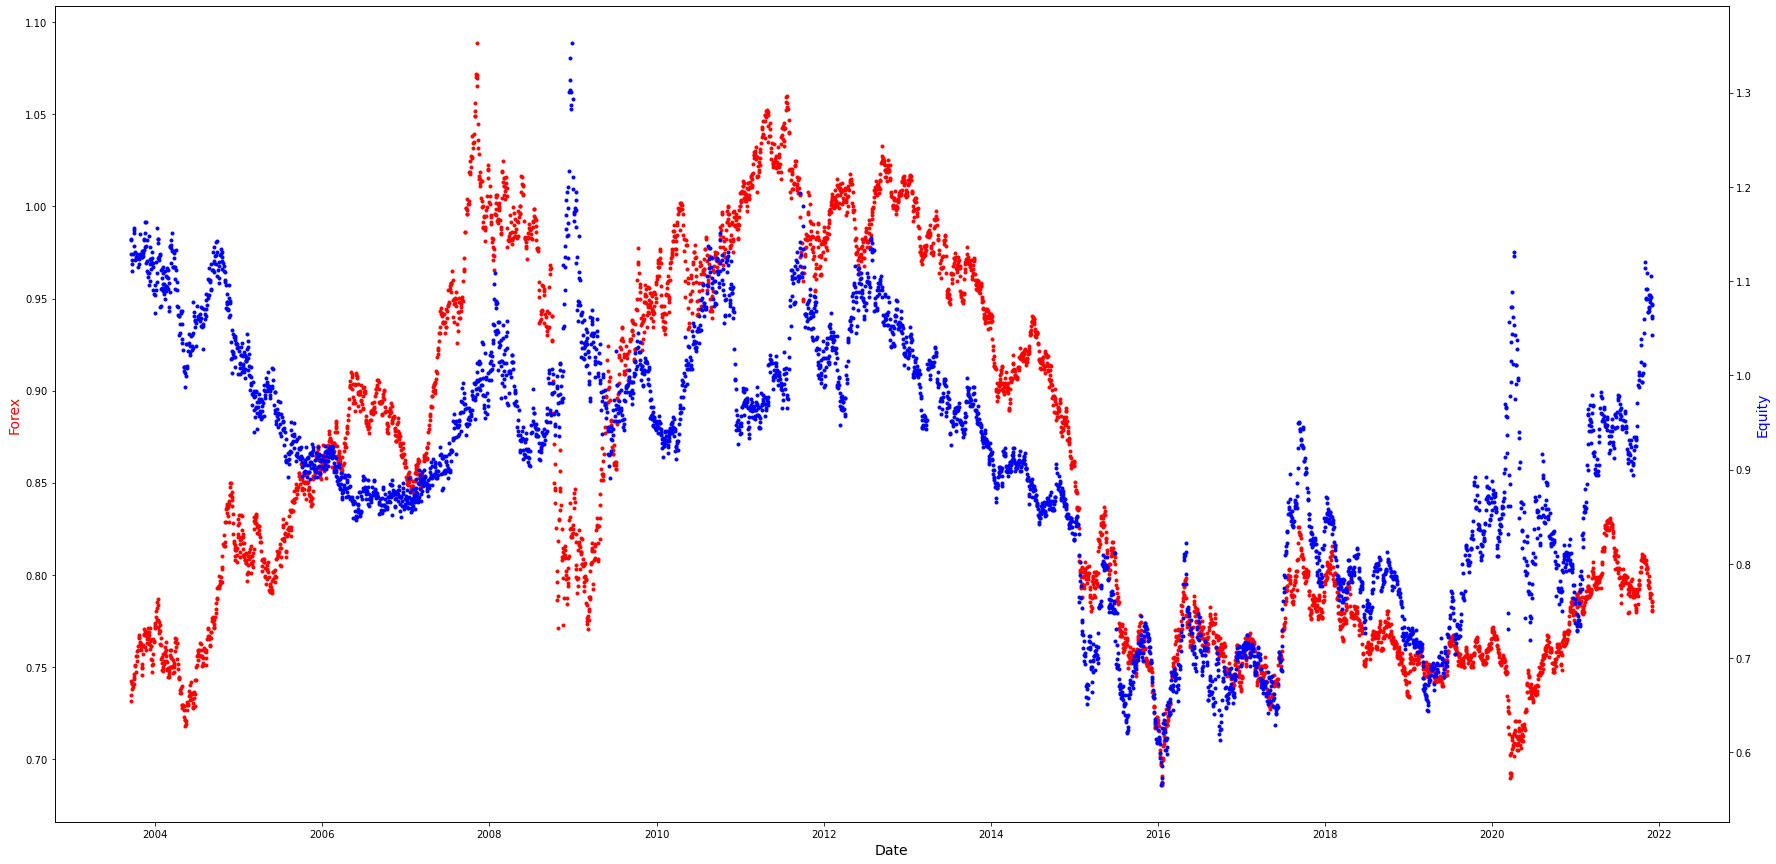

In [315]:
for i in range(len(EquitySymbols)):
    temp_e = BondDF[i]
    temp_f = ForexDF[i]
    idx = temp_e.index.intersection(temp_f.index)
    temp_e = temp_e.loc[idx]
    temp_f = temp_f.loc[idx]
    
    
    print(ForexSymbols[i])
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot
    ax.scatter(idx, temp_f, color="red", marker=".")
    # set x-axis label
    ax.set_xlabel("Date",fontsize=14)
    # set y-axis label
    ax.set_ylabel("Forex",color="red",fontsize=14)
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.scatter(idx, temp_e,color="blue",marker=".")
    ax2.set_ylabel("Equity",color="blue",fontsize=14)
    plt.show()


In [573]:
for i in range(len(EquitySymbols)):
    print(EquitySymbols[i] + " and " +  ForexSymbols[i])
    temp_e = EquityDF[i]
    temp_f = ForexDF[i]
    idx = temp_e.index.intersection(temp_f.index)
    temp_e = temp_e.loc[idx]
    temp_f = temp_f.loc[idx]
    print("Corrélation observée : " + str(temp_e.corr(temp_f)))
    print('-----------')

F/N and GBPJPY=X
Corrélation observée : -0.296800099285356
-----------
F/S and GBPUSD=X
Corrélation observée : 0.6760541594390389
-----------
D/S and EURUSD=X
Corrélation observée : 0.358688590499904
-----------
N/S and JPYUSD=X
Corrélation observée : 0.5392923047441031
-----------
O/S and CADUSD=X
Corrélation observée : nan
-----------
T/S and SEKUSD=X
Corrélation observée : -0.6691595310442813
-----------
SMI/S and CHFUSD=X
Corrélation observée : 0.5709156815238543
-----------
S/B and USDBRL=X
Corrélation observée : -0.5679790021614045
-----------
A/S and AUDUSD=X
Corrélation observée : 0.4313697532065056
-----------
T/S and CADUSD=X
Corrélation observée : -0.6937388666233367
-----------


<p>Les corrélations les plus importantes (en valeur absolue) sont :</p>
<li>Le CAD/USD avec le S&P/TSX face au S&P500</li>
<li>Le CHF/USD avec le Swiss Market Index face au S&P500</li>
<li>Le GBP/USD avec le FTSE100 face au S&P500</li>


## Regression Linéaire des variables sur la paire correspondante

Visualisons l'écart entre la valeur prédites et le cours de la paire

Paire modélisée : GBPJPY=X
Nombre d'échantillons : 7735
Valeur de l'intercept : 272.2878027401472
Coefficients de la regression : [-1.47190666e+02 -1.16715859e-02  5.71208794e-01 -7.16318432e-02]
Score R-carré de la regression : 0.7439974593641089


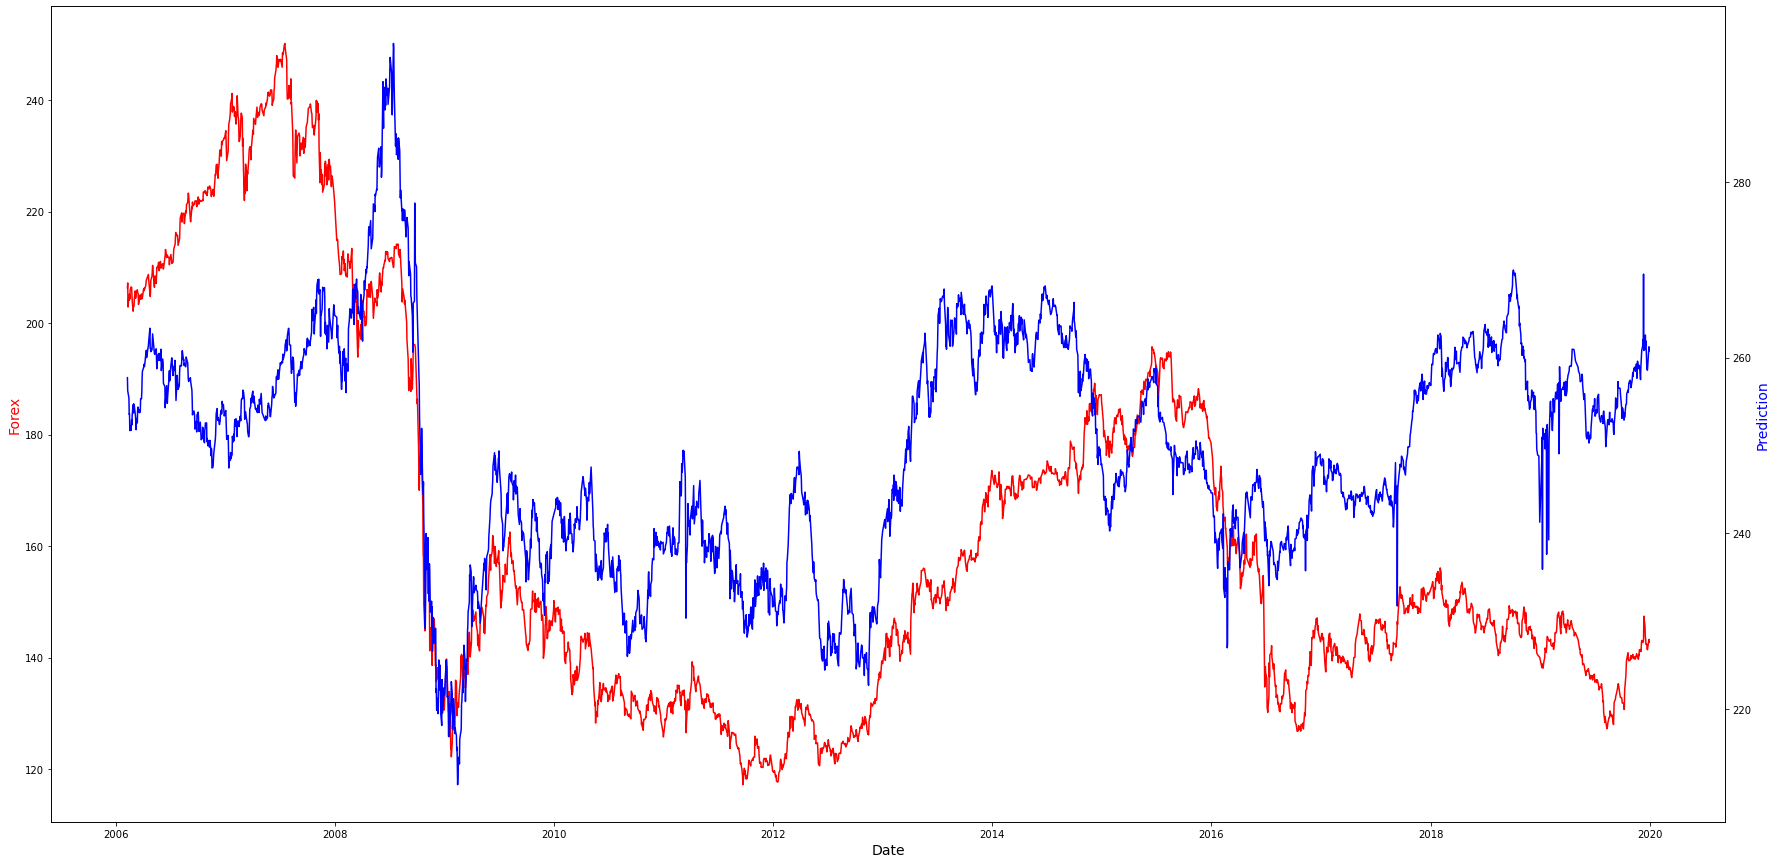

Paire modélisée : GBPUSD=X
Nombre d'échantillons : 7715
Valeur de l'intercept : 1.6159891142989968
Coefficients de la regression : [-6.46125519e-02  4.24763279e-01  4.21005683e-03 -4.02542575e-04]
Score R-carré de la regression : 0.8267855190380482


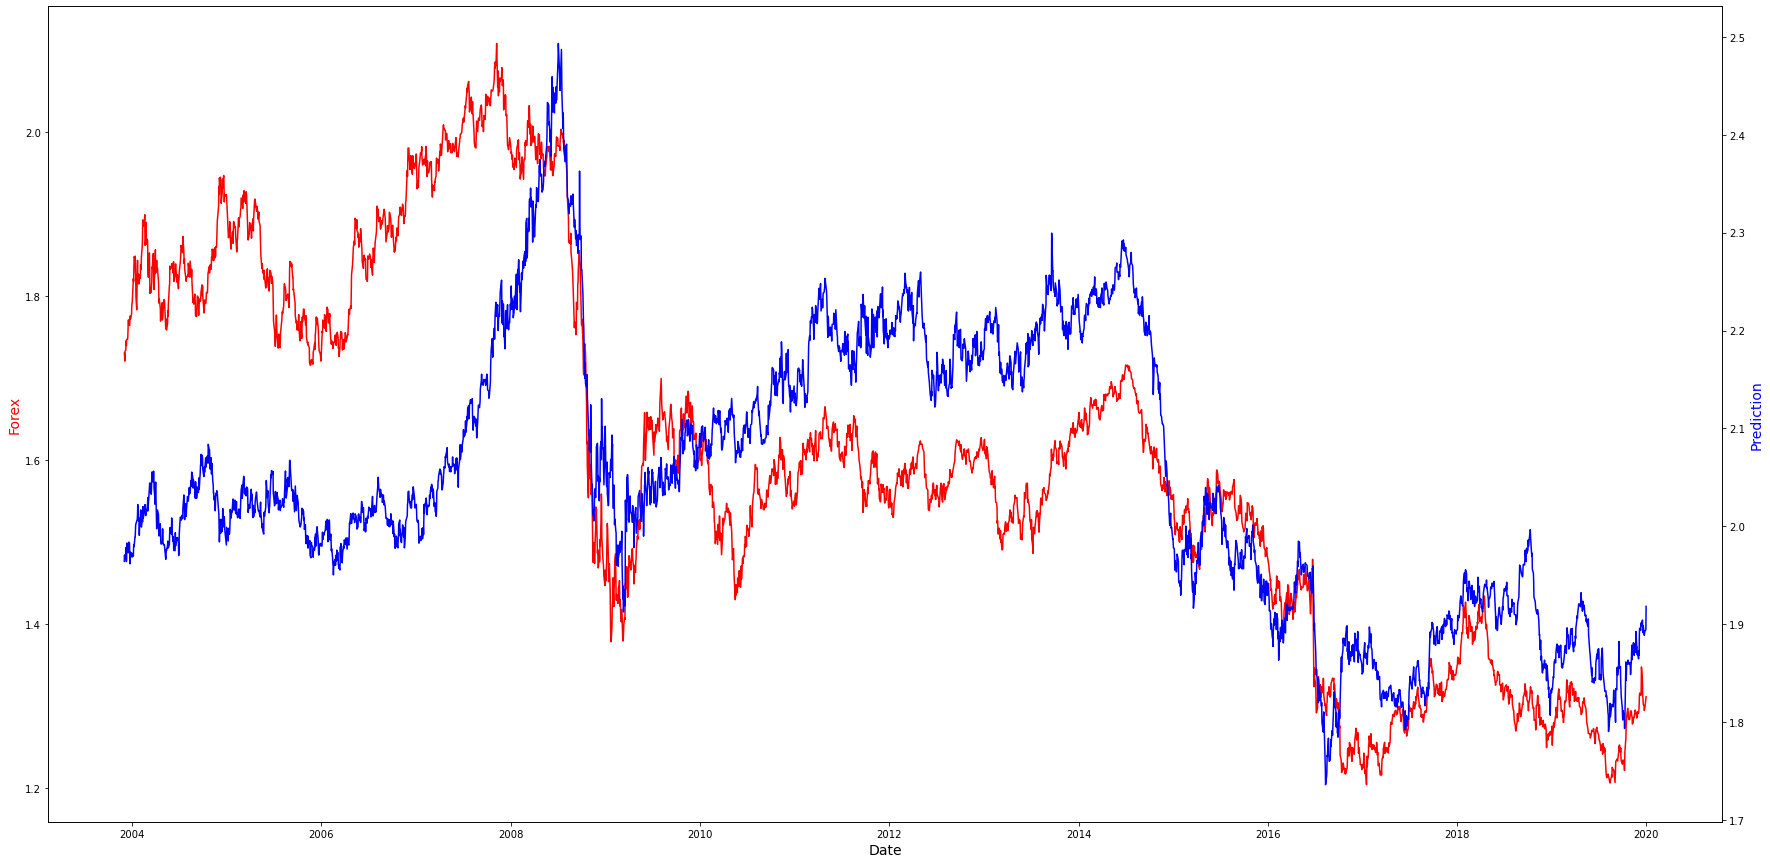

Paire modélisée : EURUSD=X
Nombre d'échantillons : 7727
Valeur de l'intercept : 0.9364322776795018
Coefficients de la regression : [ 1.88487648e-02  1.56226826e-01  2.77956816e-03 -4.53097184e-05]
Score R-carré de la regression : 0.7906306615515833


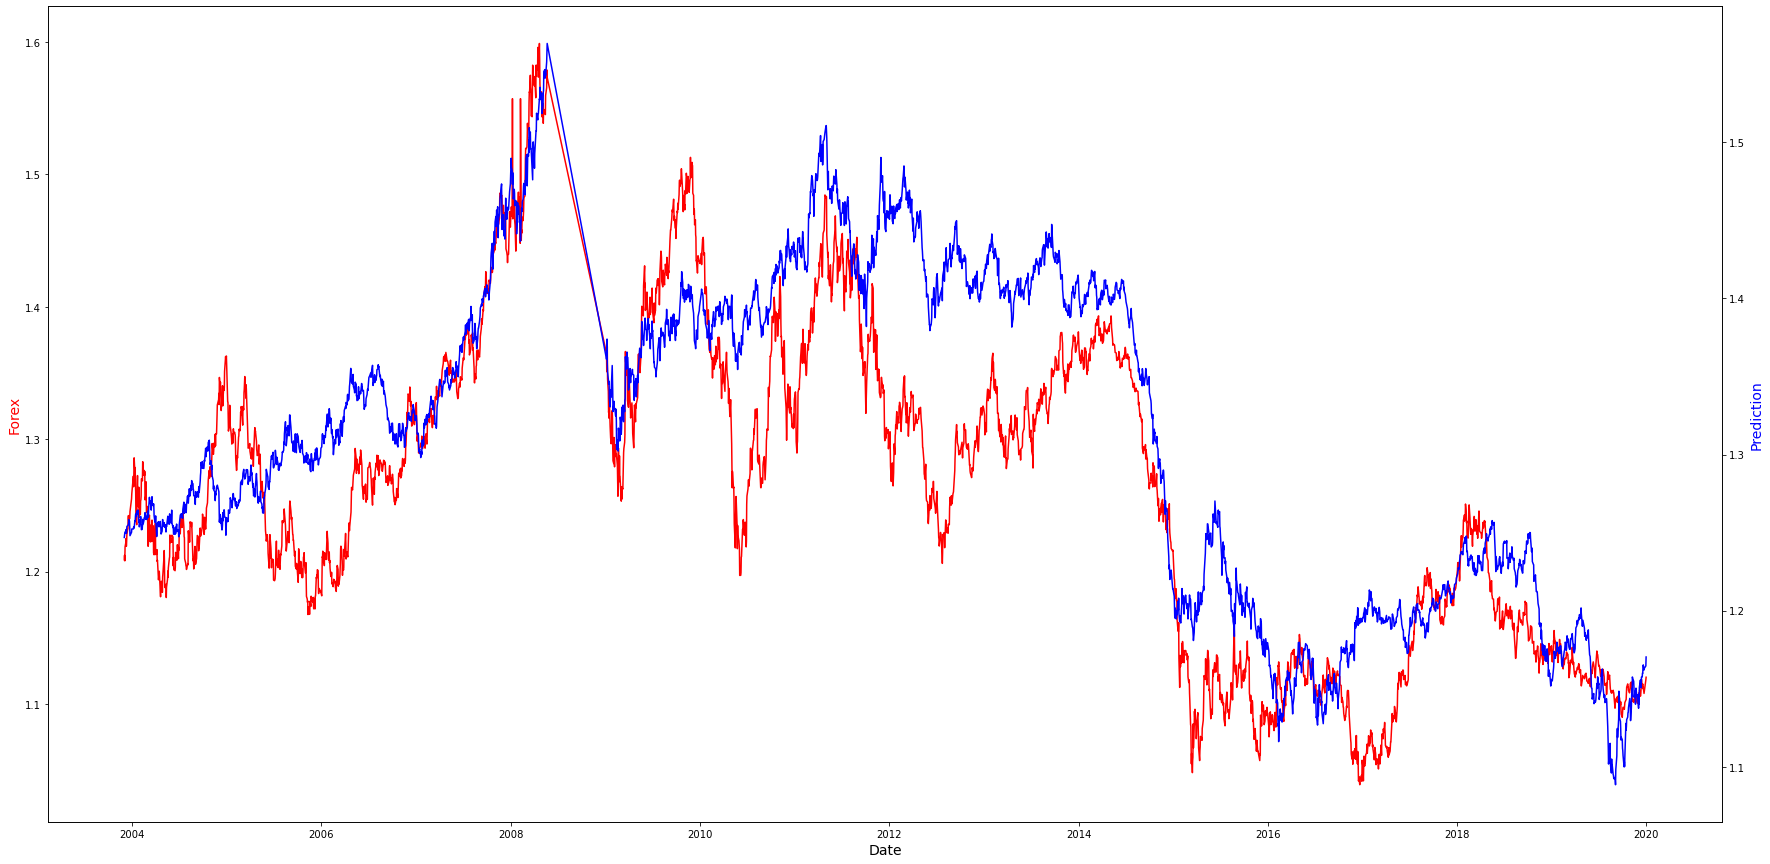

Paire modélisée : JPYUSD=X
Nombre d'échantillons : 7649
Valeur de l'intercept : 0.0027317718263513598
Coefficients de la regression : [ 4.28316149e-02  5.79396656e-03 -3.29021822e-06  7.87187109e-07]
Score R-carré de la regression : 0.8211397364135213


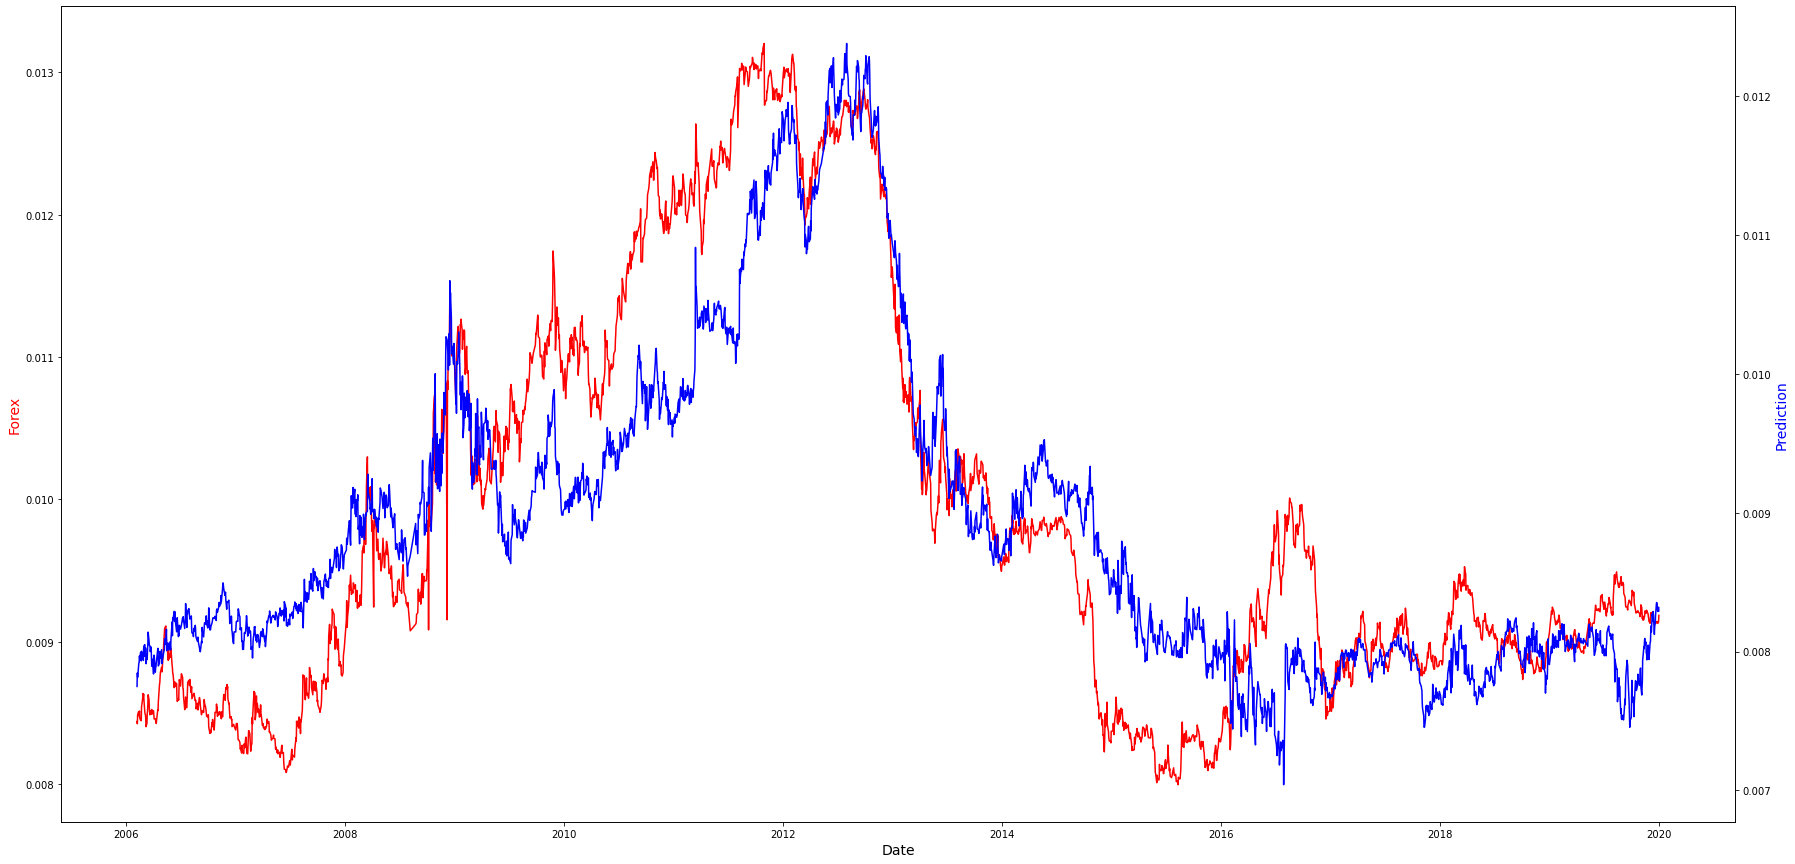

Paire modélisée : CADUSD=X
Nombre d'échantillons : 7505
Paire modélisée : SEKUSD=X
Nombre d'échantillons : 7383
Valeur de l'intercept : 0.13361325223763212
Coefficients de la regression : [-2.36759338e-01 -3.22372636e-04  5.74876099e-04 -7.76876570e-06]
Score R-carré de la regression : 0.7831226714671193


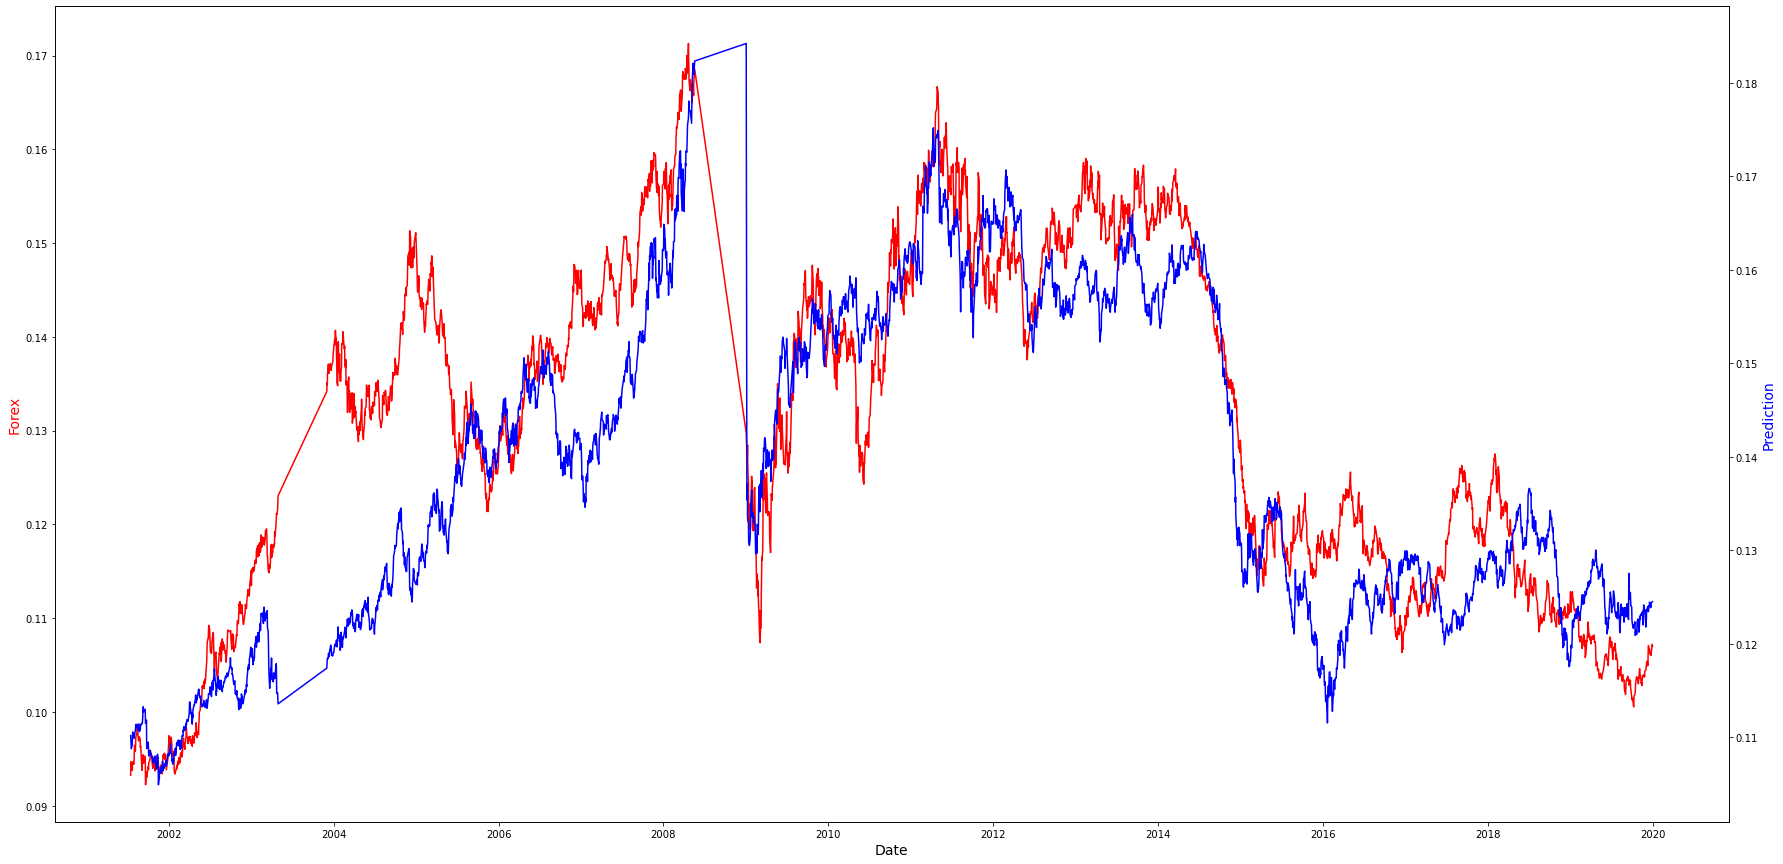

Paire modélisée : CHFUSD=X
Nombre d'échantillons : 7667
Valeur de l'intercept : 0.5629074222649717
Coefficients de la regression : [3.73840724e-01 2.59378057e-02 7.37598157e-04 2.36912963e-04]
Score R-carré de la regression : 0.8560499074836008


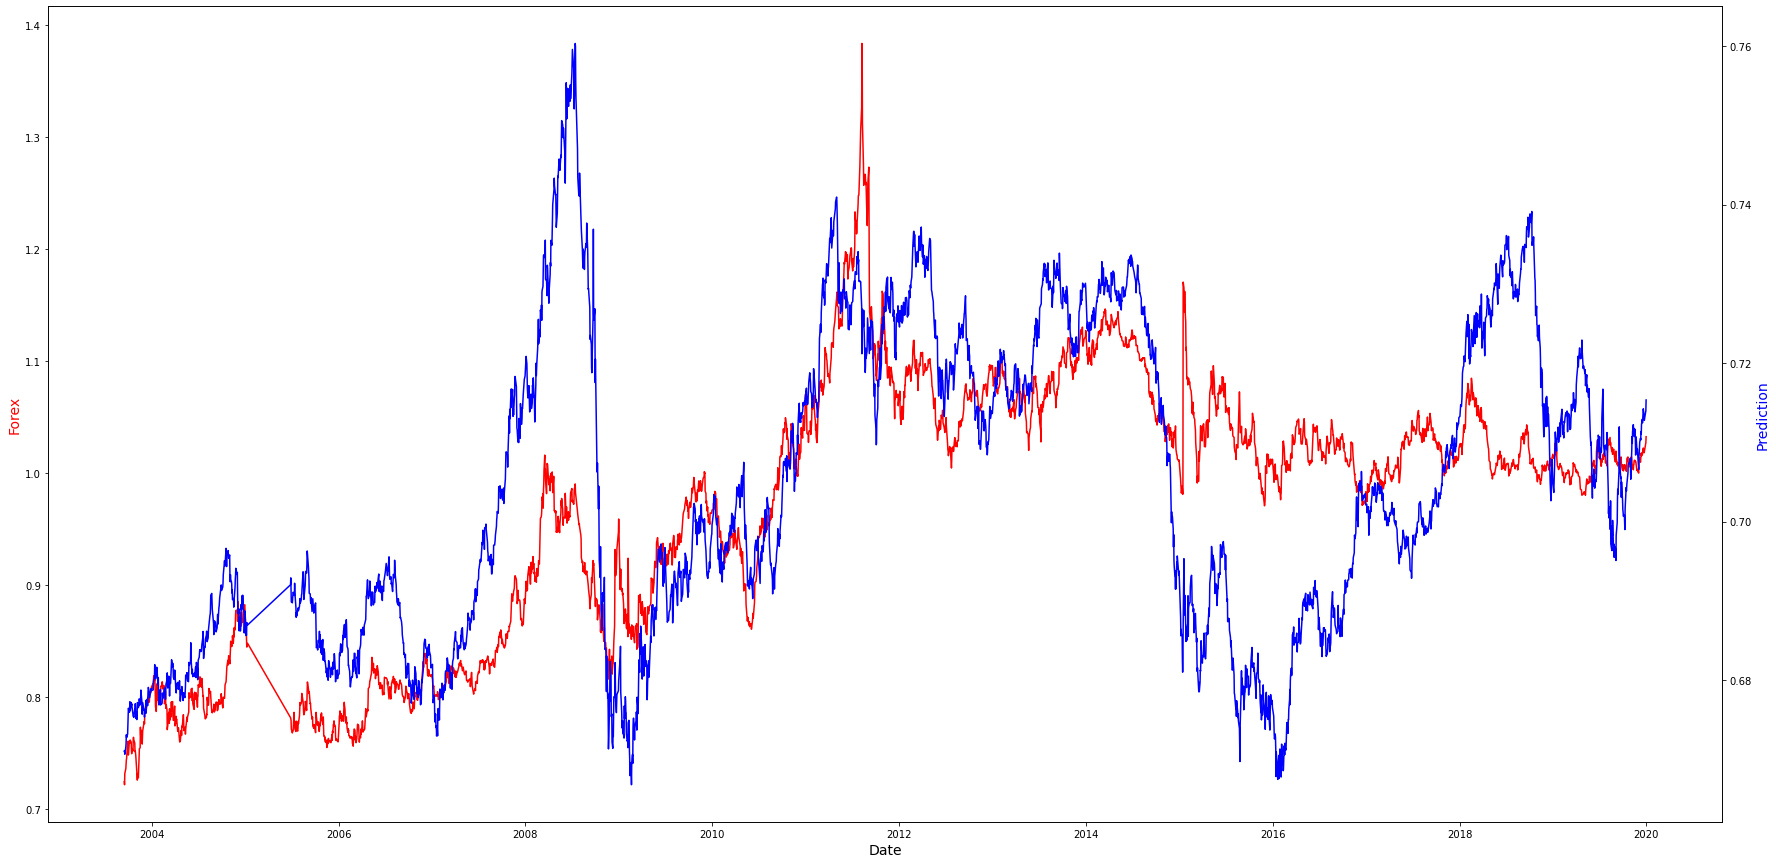

Paire modélisée : USDBRL=X
Nombre d'échantillons : 7600
Valeur de l'intercept : 3.7145297859633715
Coefficients de la regression : [-3.98037573e-02  4.75249447e+00 -2.26153518e-02  7.51572207e-04]
Score R-carré de la regression : 0.8209907128203702


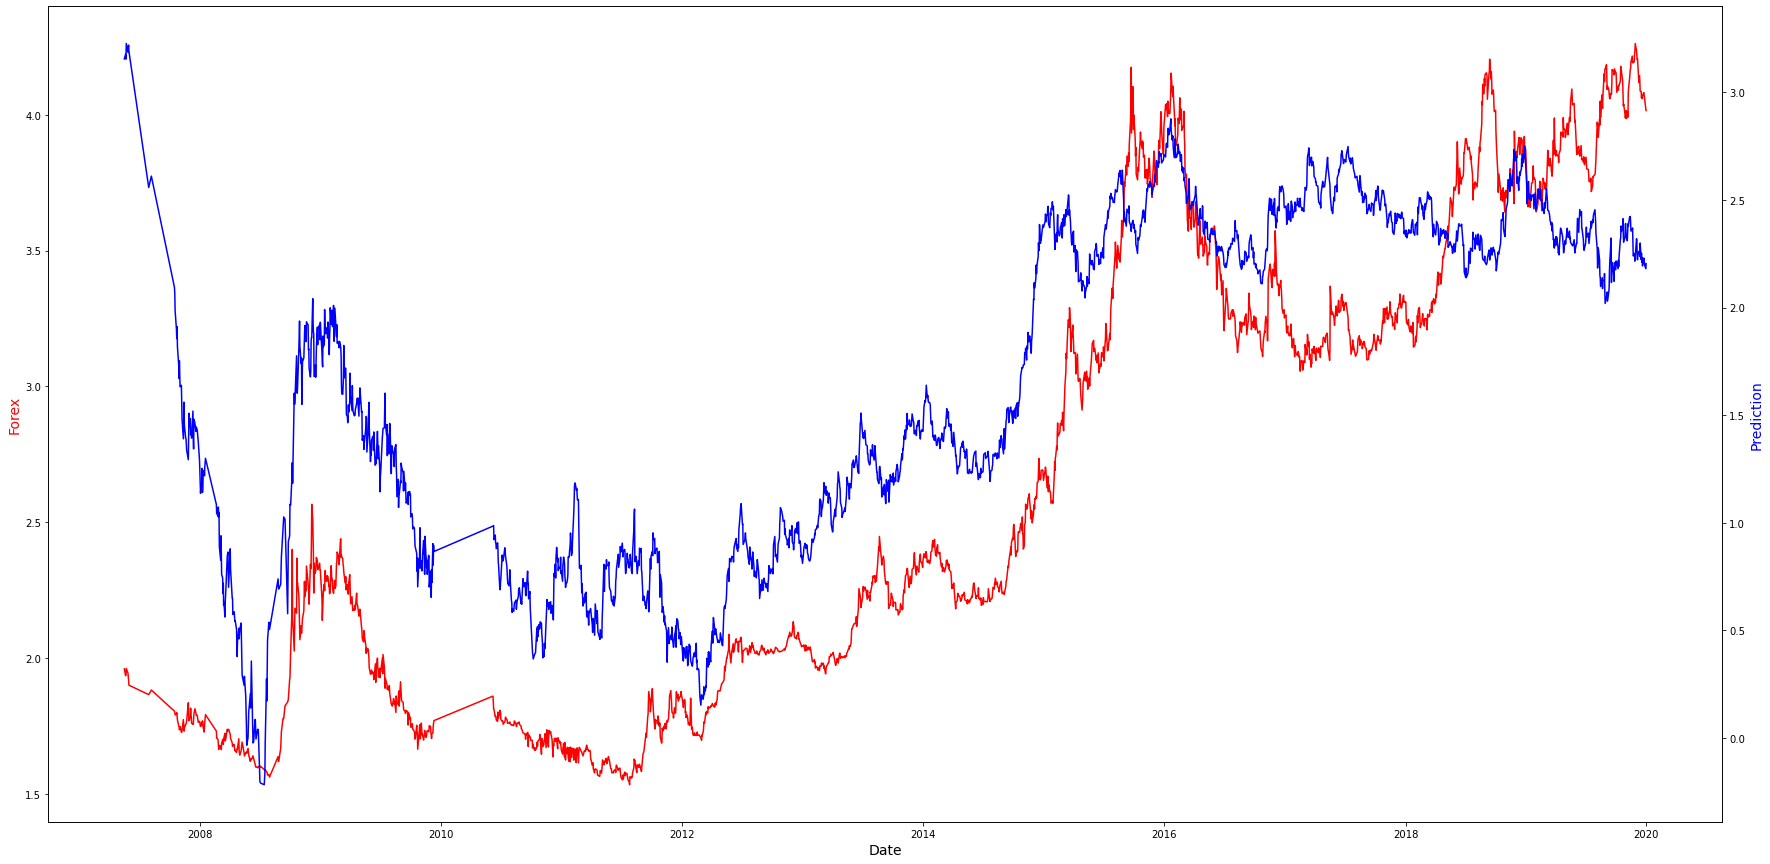

Paire modélisée : AUDUSD=X
Nombre d'échantillons : 7726
Valeur de l'intercept : 0.23648629594297177
Coefficients de la regression : [0.0217238  0.12736544 0.00267418 0.00013379]
Score R-carré de la regression : 0.8805759766921547


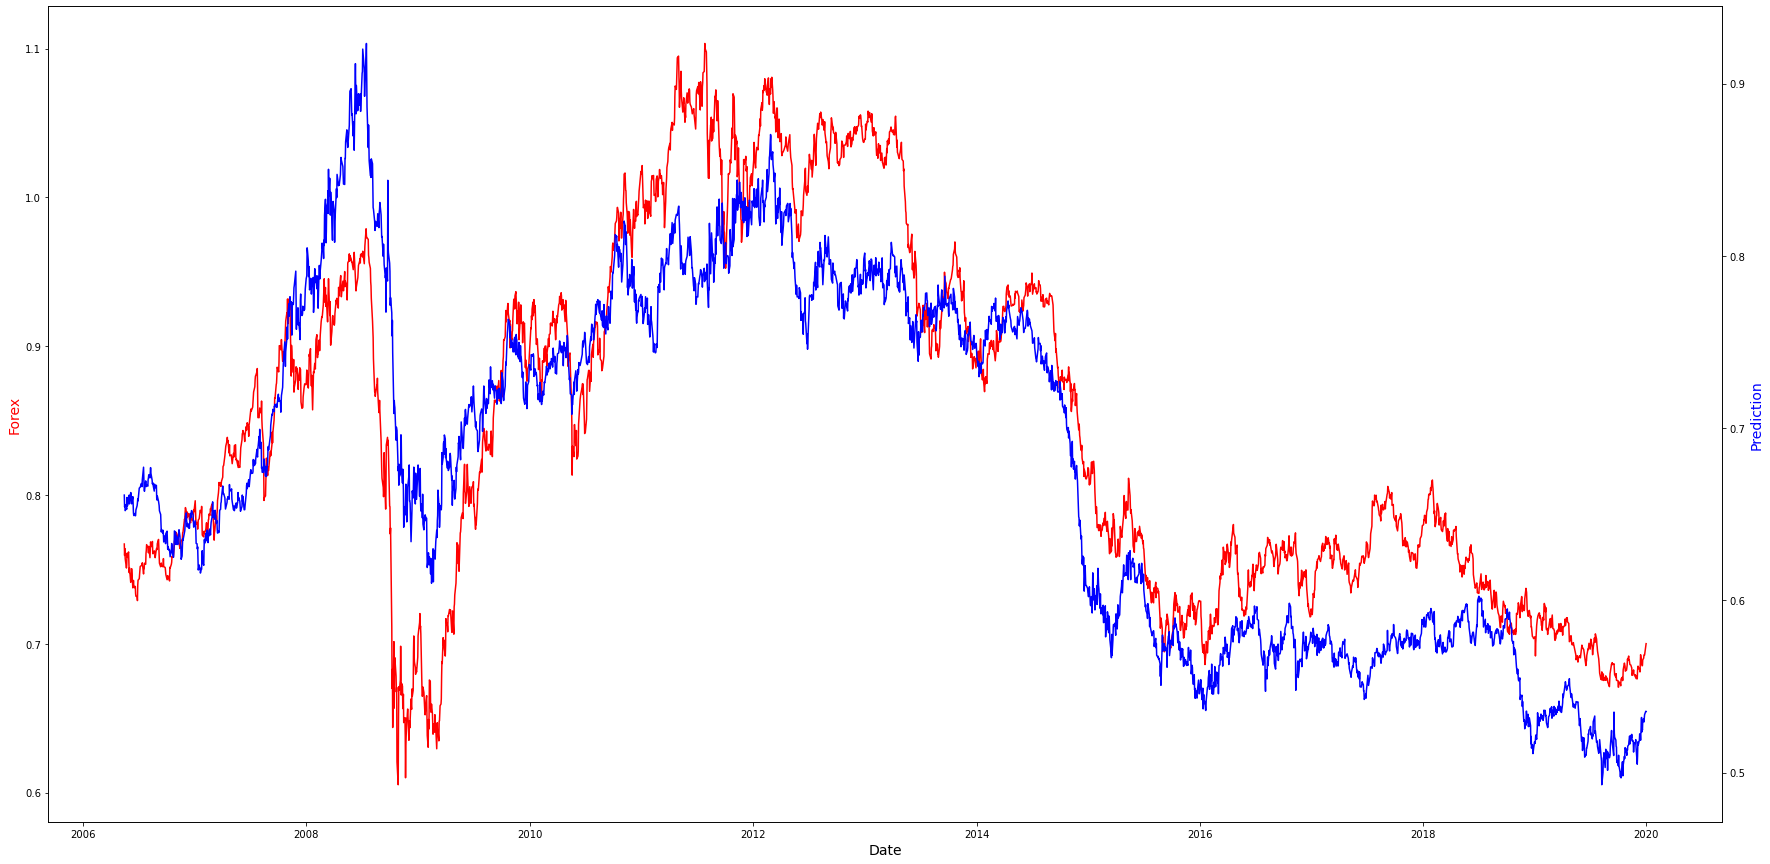

Paire modélisée : CADUSD=X
Nombre d'échantillons : 7637
Valeur de l'intercept : 0.7581317295924985
Coefficients de la regression : [-1.57276847e+00  1.08229897e-01  2.32786103e-03  4.58401172e-05]
Score R-carré de la regression : 0.9059616150315644


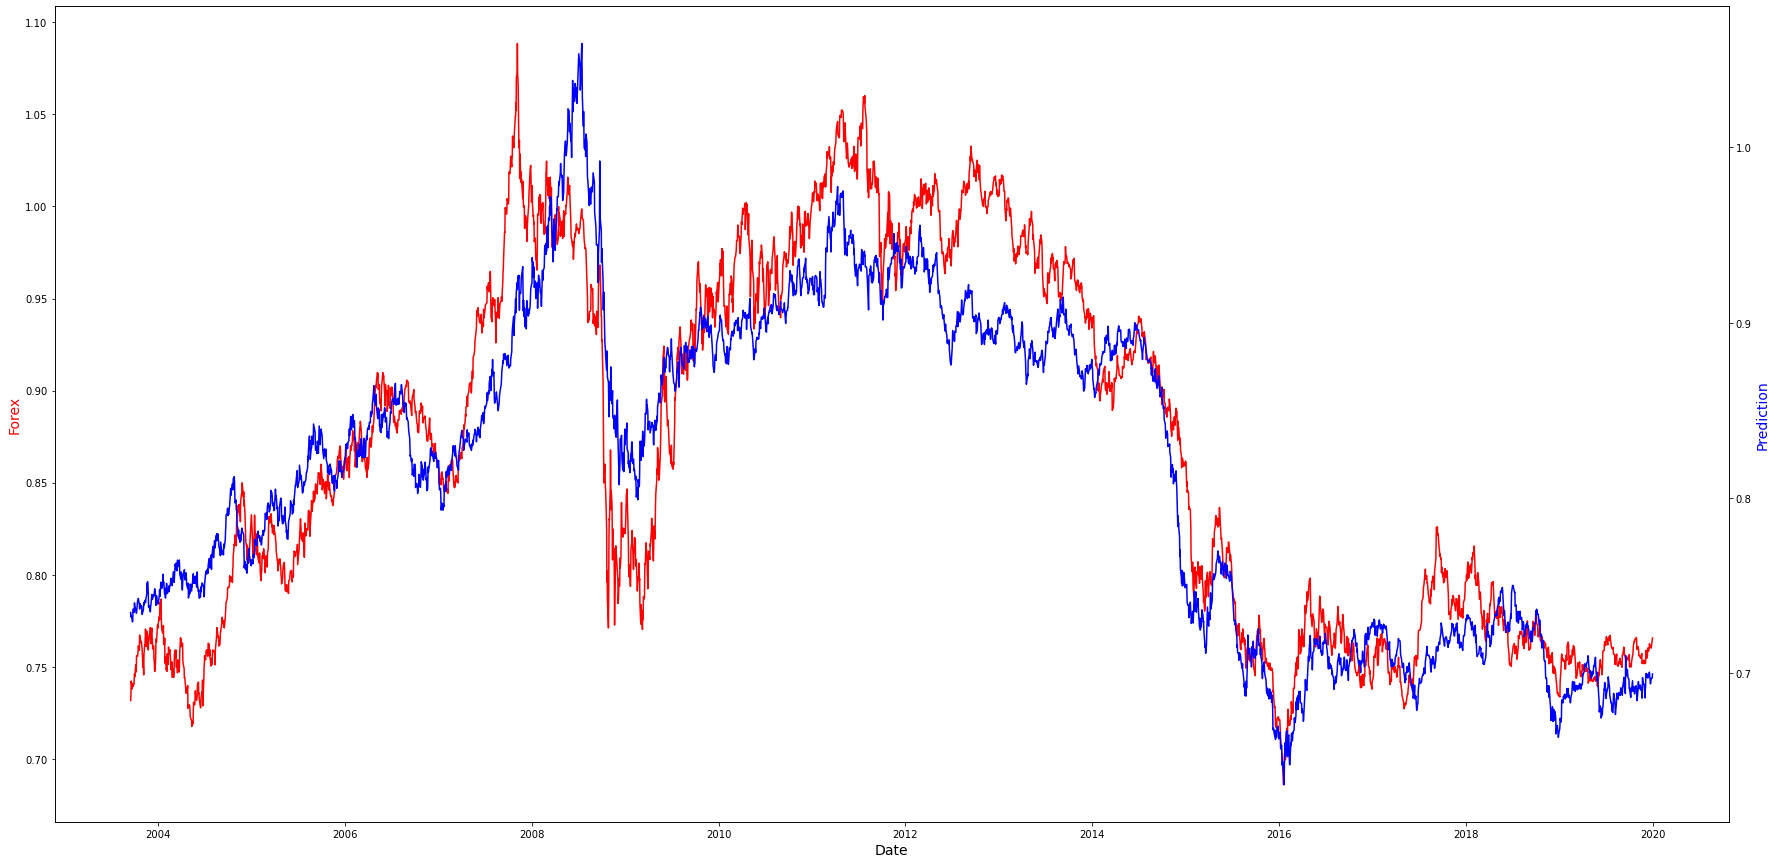

In [574]:
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"] = (30,15)

for i in range(len(ForexSymbols)):
    try:
        print("Paire modélisée : " + ForexSymbols[i])
        #créer un objet reg lin
        modeleReg = LinearRegression()

        #créer y et X
        X = pd.DataFrame(index=EquityDF[i].index.intersection(BondDF[i].index))
        X["Equity Ratio"]=EquityDF[i].loc[EquityDF[i].index.intersection(BondDF[i].index)]
        X["Yield Ratio"]=BondDF[i].loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index))].replace([np.inf, -np.inf], np.nan).dropna(axis=0)
        X["WTI"] = WTI.dropna(axis=0).loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index))]
        X["Gold"] =  Gold.dropna(axis=0).loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index.intersection(Gold.index)))]
        y=ForexDF[i].dropna()

        print("Nombre d'échantillons : "+str(len(X))) 
        X = X.shift(1).dropna()
        X=X.loc[X.index.intersection(y.index)]
        y=y.loc[X.index.intersection(y.index)]
        idx=X.index.intersection(y.index)
        X=X.values
        
        modeleReg.fit(X,y)
        print("Valeur de l'intercept : " + str(modeleReg.intercept_))
        print("Coefficients de la regression : " + str(modeleReg.coef_))

        #calcul du R²
        print("Score R-carré de la regression : " + str(modeleReg.score(X,y)))

        fig,ax = plt.subplots()
        # make a plot
        ax.plot(idx, y, color="red")
        # set x-axis label
        ax.set_xlabel("Date",fontsize=14)
        # set y-axis label
        ax.set_ylabel("Forex",color="red",fontsize=14)
        # twin object for two different y-axis on the sample plot
        ax2=ax.twinx()
        # make a plot with different y-axis using second axis object
        ax2.plot(idx,modeleReg.intercept_ +  X[:,0]*modeleReg.coef_[0]+X[:,1]*modeleReg.coef_[1]+X[:,2]*modeleReg.coef_[2],color="blue")
        ax2.set_ylabel("Prediction",color="blue",fontsize=14)
        plt.show()
    
    except: pass

Convergence de l'estimateur

GBPJPY=X
Regression with 100 rows
GBPJPY=X
Regression with 200 rows
GBPJPY=X
Regression with 300 rows
GBPJPY=X
Regression with 400 rows
GBPJPY=X
Regression with 500 rows
GBPJPY=X
Regression with 600 rows
GBPJPY=X
Regression with 700 rows
GBPJPY=X
Regression with 800 rows
GBPJPY=X
Regression with 900 rows
GBPJPY=X
Regression with 1000 rows
GBPJPY=X
Regression with 1100 rows
GBPJPY=X
Regression with 1200 rows
GBPJPY=X
Regression with 1300 rows
GBPJPY=X
Regression with 1400 rows
GBPJPY=X
Regression with 1500 rows
GBPJPY=X
Regression with 1600 rows
GBPJPY=X
Regression with 1700 rows
GBPJPY=X
Regression with 1800 rows
GBPJPY=X
Regression with 1900 rows
GBPJPY=X
Regression with 2000 rows
GBPJPY=X
Regression with 2100 rows
GBPJPY=X
Regression with 2200 rows
GBPJPY=X
Regression with 2300 rows
GBPJPY=X
Regression with 2400 rows
GBPJPY=X
Regression with 2500 rows
GBPJPY=X
Regression with 2600 rows
GBPJPY=X
Regression with 2700 rows
GBPJPY=X
Regression with 2800 rows
GBPJPY=X
Regression with 2900

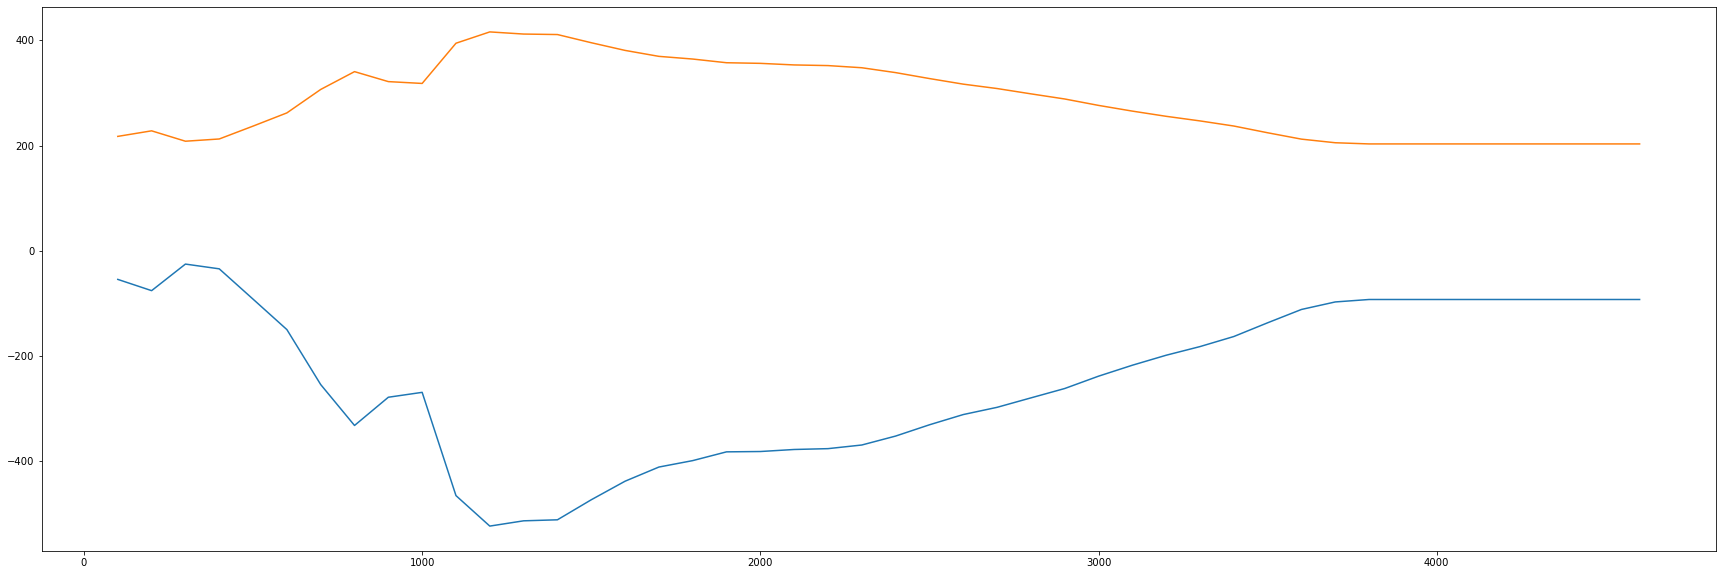

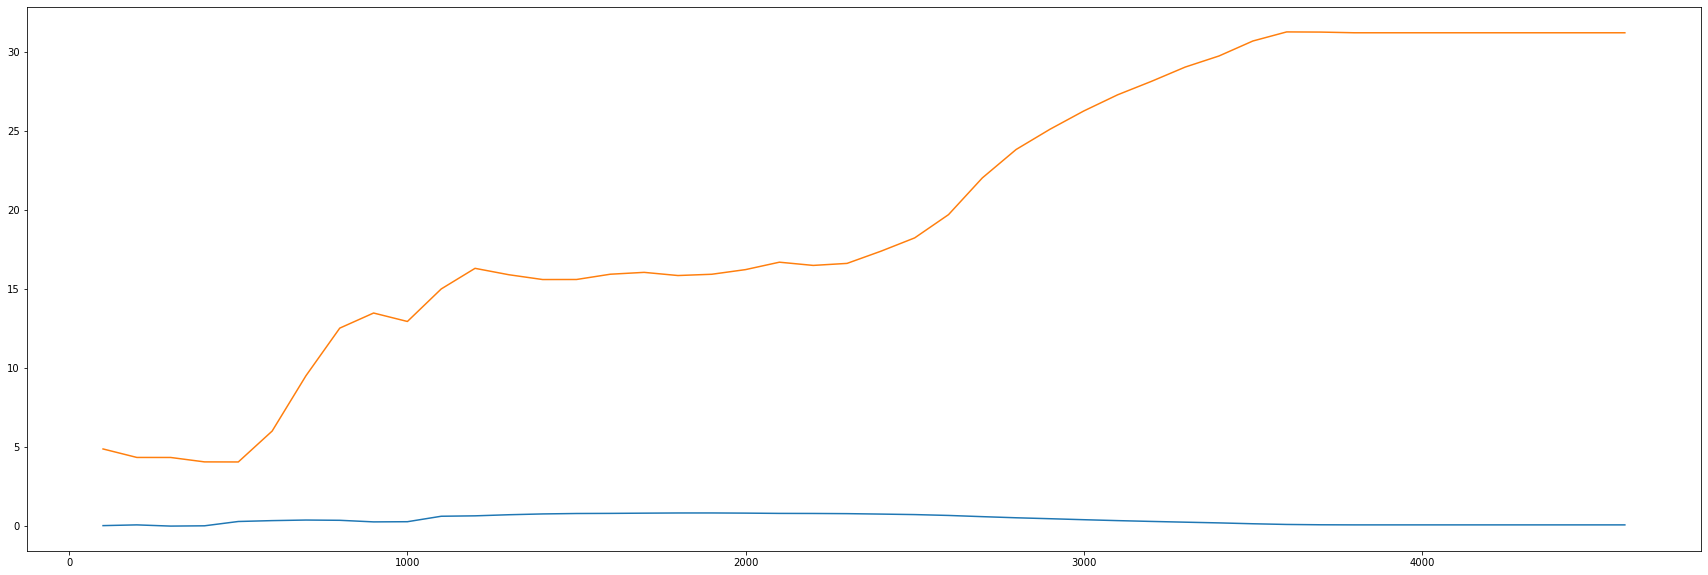

GBPUSD=X
Regression with 100 rows
GBPUSD=X
Regression with 200 rows
GBPUSD=X
Regression with 300 rows
GBPUSD=X
Regression with 400 rows
GBPUSD=X
Regression with 500 rows
GBPUSD=X
Regression with 600 rows
GBPUSD=X
Regression with 700 rows
GBPUSD=X
Regression with 800 rows
GBPUSD=X
Regression with 900 rows
GBPUSD=X
Regression with 1000 rows
GBPUSD=X
Regression with 1100 rows
GBPUSD=X
Regression with 1200 rows
GBPUSD=X
Regression with 1300 rows
GBPUSD=X
Regression with 1400 rows
GBPUSD=X
Regression with 1500 rows
GBPUSD=X
Regression with 1600 rows
GBPUSD=X
Regression with 1700 rows
GBPUSD=X
Regression with 1800 rows
GBPUSD=X
Regression with 1900 rows
GBPUSD=X
Regression with 2000 rows
GBPUSD=X
Regression with 2100 rows
GBPUSD=X
Regression with 2200 rows
GBPUSD=X
Regression with 2300 rows
GBPUSD=X
Regression with 2400 rows
GBPUSD=X
Regression with 2500 rows
GBPUSD=X
Regression with 2600 rows
GBPUSD=X
Regression with 2700 rows
GBPUSD=X
Regression with 2800 rows
GBPUSD=X
Regression with 2900

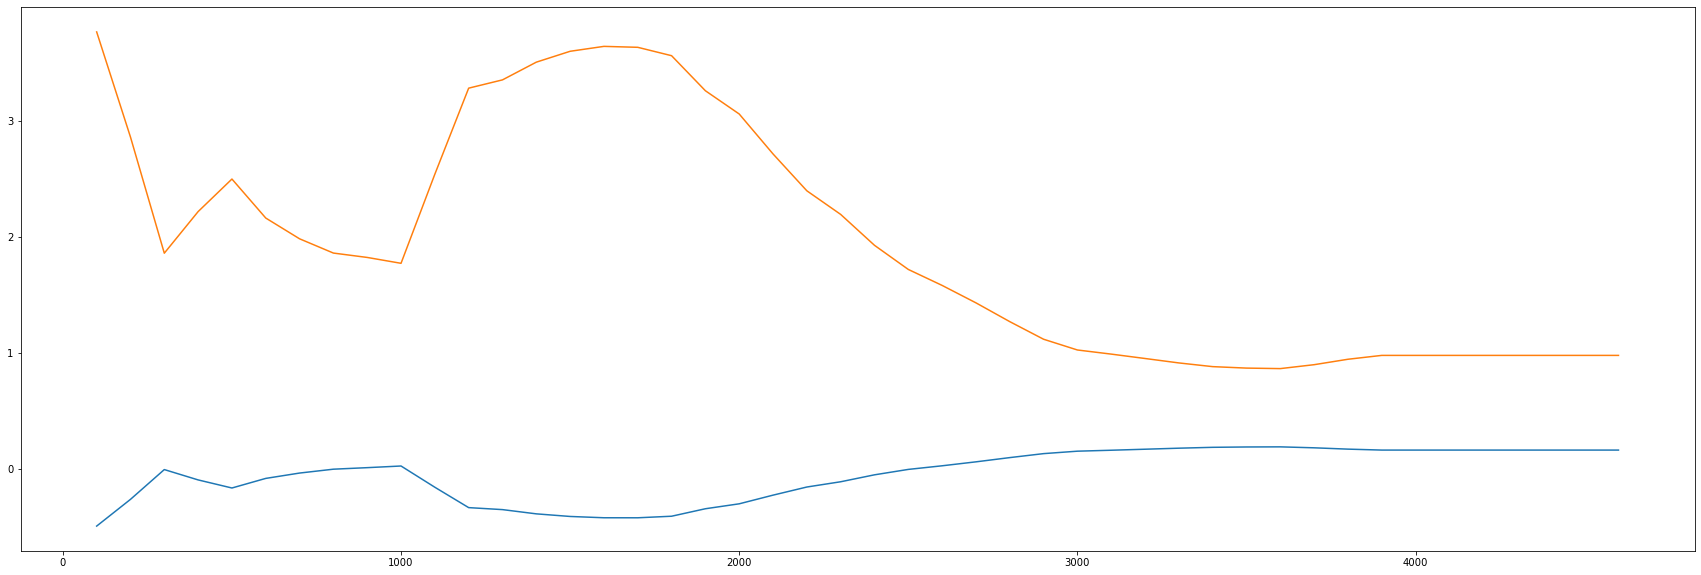

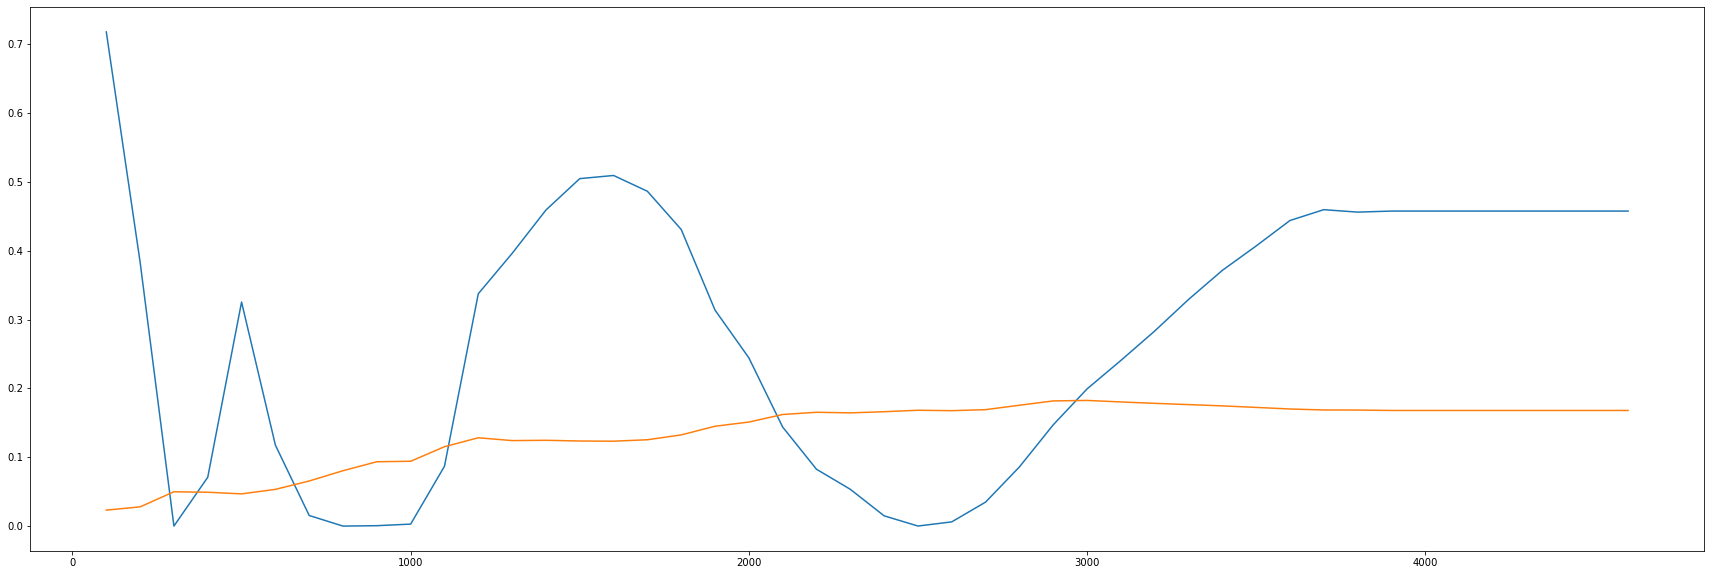

EURUSD=X
Regression with 100 rows
EURUSD=X
Regression with 200 rows
EURUSD=X
Regression with 300 rows
EURUSD=X
Regression with 400 rows
EURUSD=X
Regression with 500 rows
EURUSD=X
Regression with 600 rows
EURUSD=X
Regression with 700 rows
EURUSD=X
Regression with 800 rows
EURUSD=X
Regression with 900 rows
EURUSD=X
Regression with 1000 rows
EURUSD=X
Regression with 1100 rows
EURUSD=X
Regression with 1200 rows
EURUSD=X
Regression with 1300 rows
EURUSD=X
Regression with 1400 rows
EURUSD=X
Regression with 1500 rows
EURUSD=X
Regression with 1600 rows
EURUSD=X
Regression with 1700 rows
EURUSD=X
Regression with 1800 rows
EURUSD=X
Regression with 1900 rows
EURUSD=X
Regression with 2000 rows
EURUSD=X
Regression with 2100 rows
EURUSD=X
Regression with 2200 rows
EURUSD=X
Regression with 2300 rows
EURUSD=X
Regression with 2400 rows
EURUSD=X
Regression with 2500 rows
EURUSD=X
Regression with 2600 rows
EURUSD=X
Regression with 2700 rows
EURUSD=X
Regression with 2800 rows
EURUSD=X
Regression with 2900

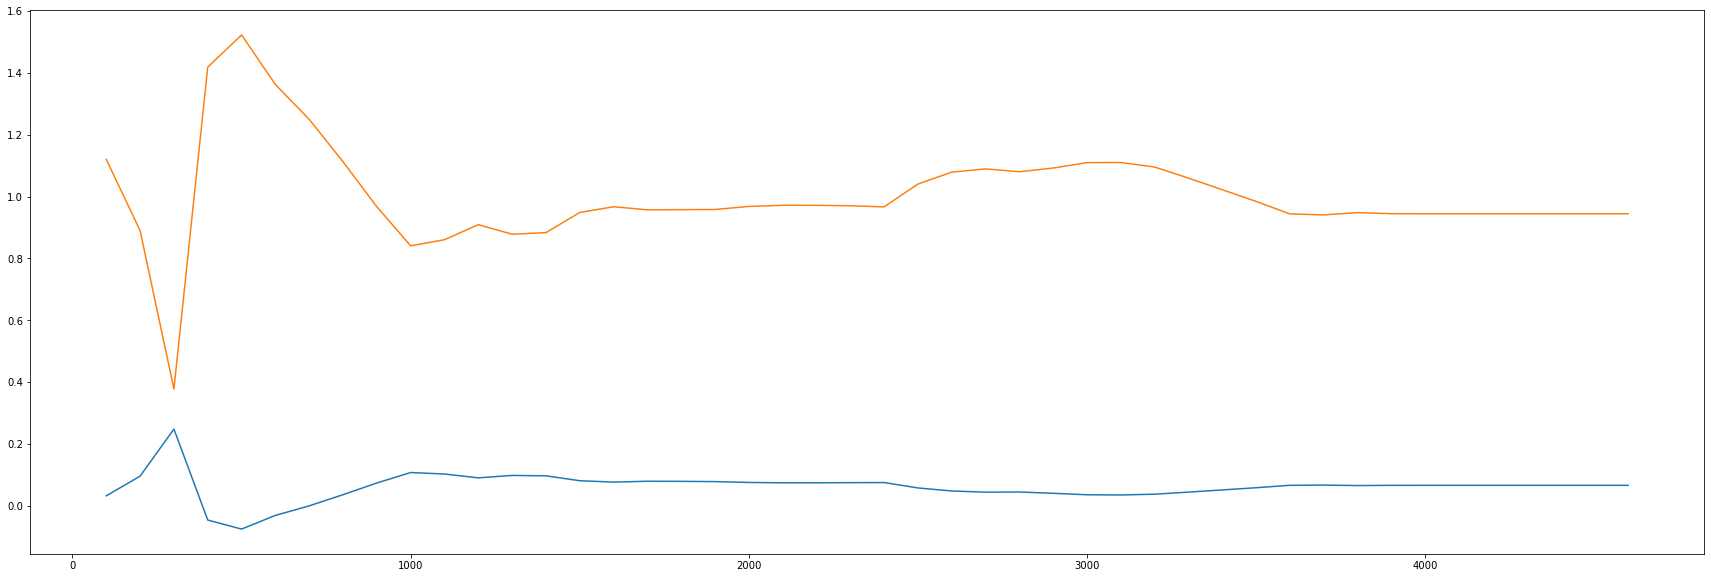

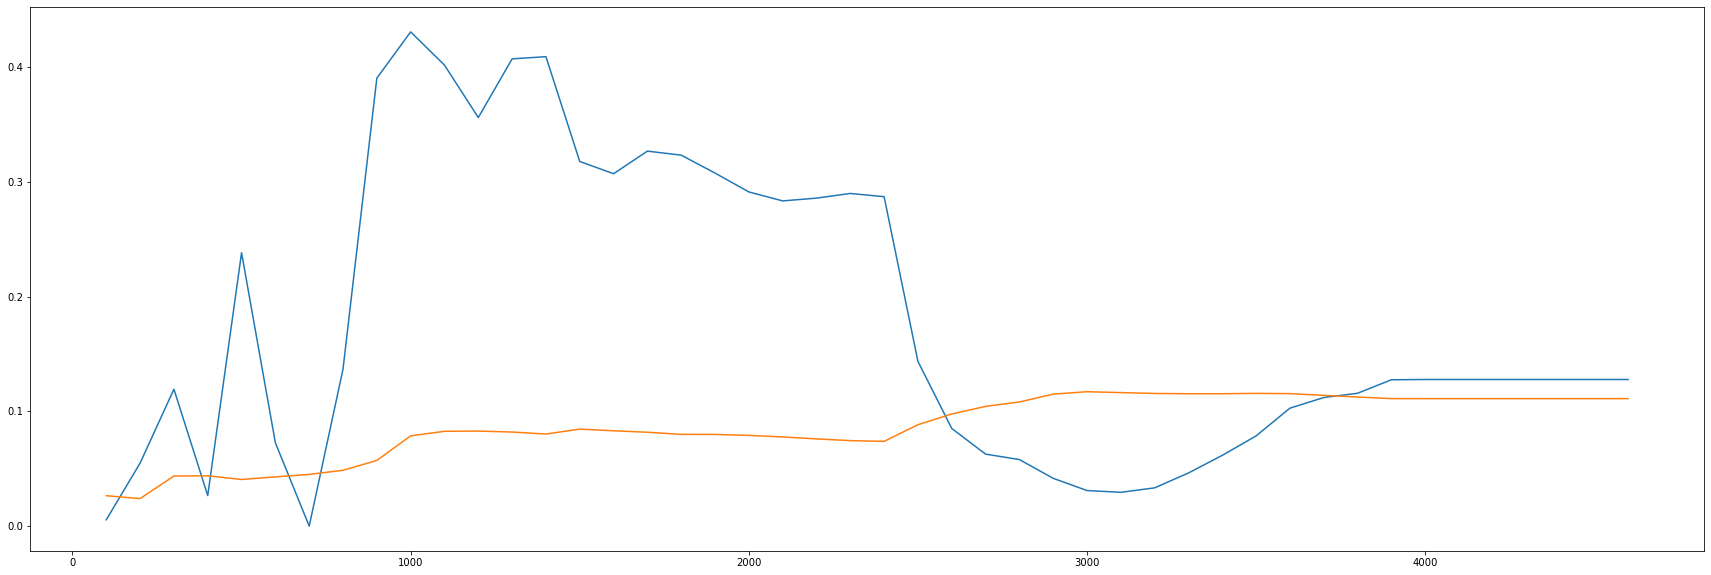

JPYUSD=X
Regression with 100 rows
JPYUSD=X
Regression with 200 rows
JPYUSD=X
Regression with 300 rows
JPYUSD=X
Regression with 400 rows
JPYUSD=X
Regression with 500 rows
JPYUSD=X
Regression with 600 rows
JPYUSD=X
Regression with 700 rows
JPYUSD=X
Regression with 800 rows
JPYUSD=X
Regression with 900 rows
JPYUSD=X
Regression with 1000 rows
JPYUSD=X
Regression with 1100 rows
JPYUSD=X
Regression with 1200 rows
JPYUSD=X
Regression with 1300 rows
JPYUSD=X
Regression with 1400 rows
JPYUSD=X
Regression with 1500 rows
JPYUSD=X
Regression with 1600 rows
JPYUSD=X
Regression with 1700 rows
JPYUSD=X
Regression with 1800 rows
JPYUSD=X
Regression with 1900 rows
JPYUSD=X
Regression with 2000 rows
JPYUSD=X
Regression with 2100 rows
JPYUSD=X
Regression with 2200 rows
JPYUSD=X
Regression with 2300 rows
JPYUSD=X
Regression with 2400 rows
JPYUSD=X
Regression with 2500 rows
JPYUSD=X
Regression with 2600 rows
JPYUSD=X
Regression with 2700 rows
JPYUSD=X
Regression with 2800 rows
JPYUSD=X
Regression with 2900

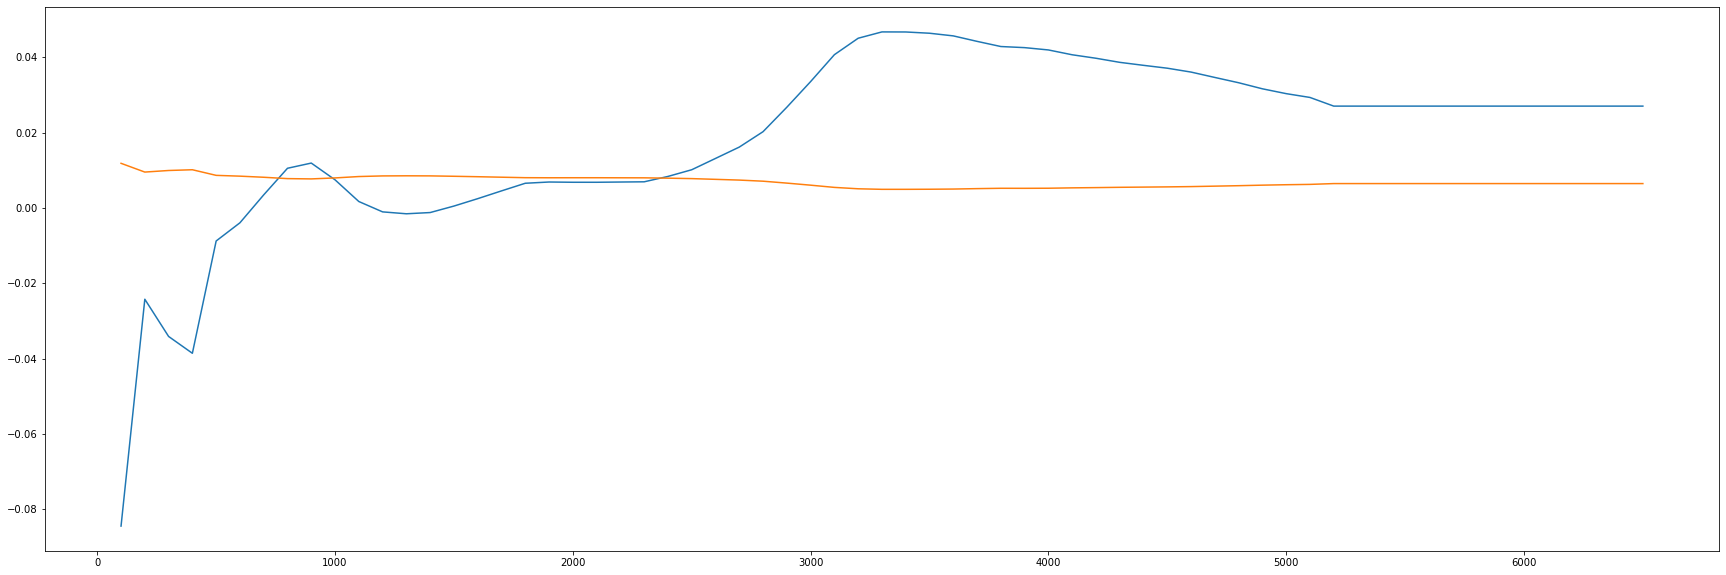

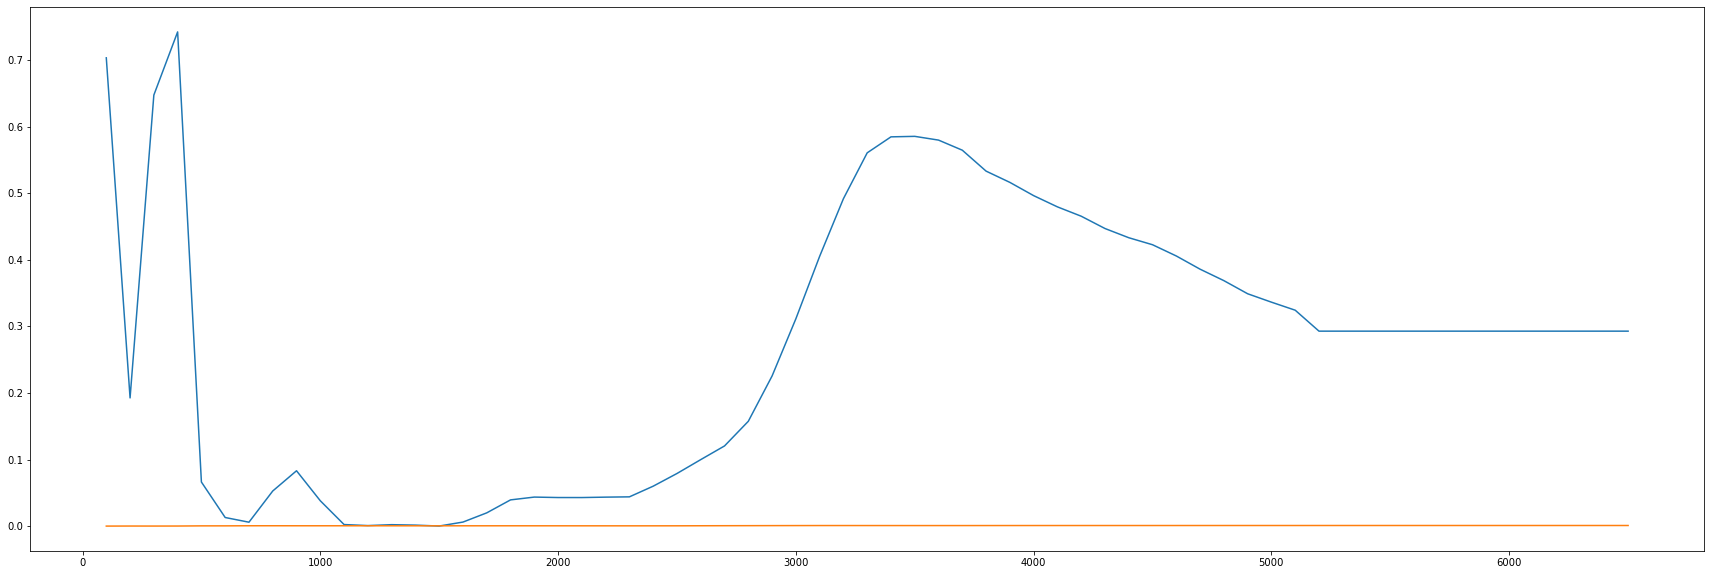

CADUSD=X
Regression with 100 rows
CADUSD=X
Regression with 200 rows
CADUSD=X
Regression with 300 rows
CADUSD=X
Regression with 400 rows
CADUSD=X
Regression with 500 rows
CADUSD=X
Regression with 600 rows
CADUSD=X
Regression with 700 rows
CADUSD=X
Regression with 800 rows
CADUSD=X
Regression with 900 rows
CADUSD=X
Regression with 1000 rows
CADUSD=X
Regression with 1100 rows
CADUSD=X
Regression with 1200 rows
CADUSD=X
Regression with 1300 rows
CADUSD=X
Regression with 1400 rows
CADUSD=X
Regression with 1500 rows
CADUSD=X
Regression with 1600 rows
CADUSD=X
Regression with 1700 rows
CADUSD=X
Regression with 1800 rows
CADUSD=X
Regression with 1900 rows
CADUSD=X
Regression with 2000 rows
CADUSD=X
Regression with 2100 rows
CADUSD=X
Regression with 2200 rows
CADUSD=X
Regression with 2300 rows
CADUSD=X
Regression with 2400 rows
CADUSD=X
Regression with 2500 rows
CADUSD=X
Regression with 2600 rows
CADUSD=X
Regression with 2700 rows
CADUSD=X
Regression with 2800 rows
CADUSD=X
Regression with 2900

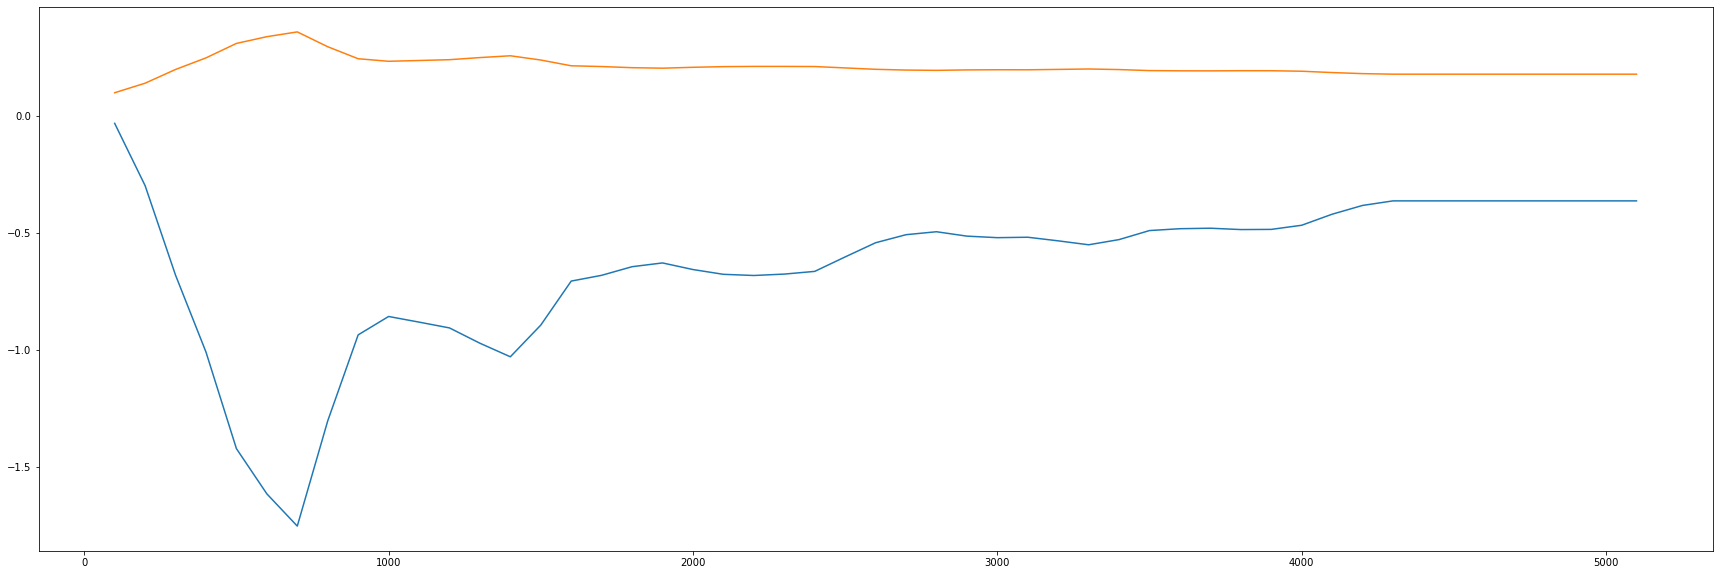

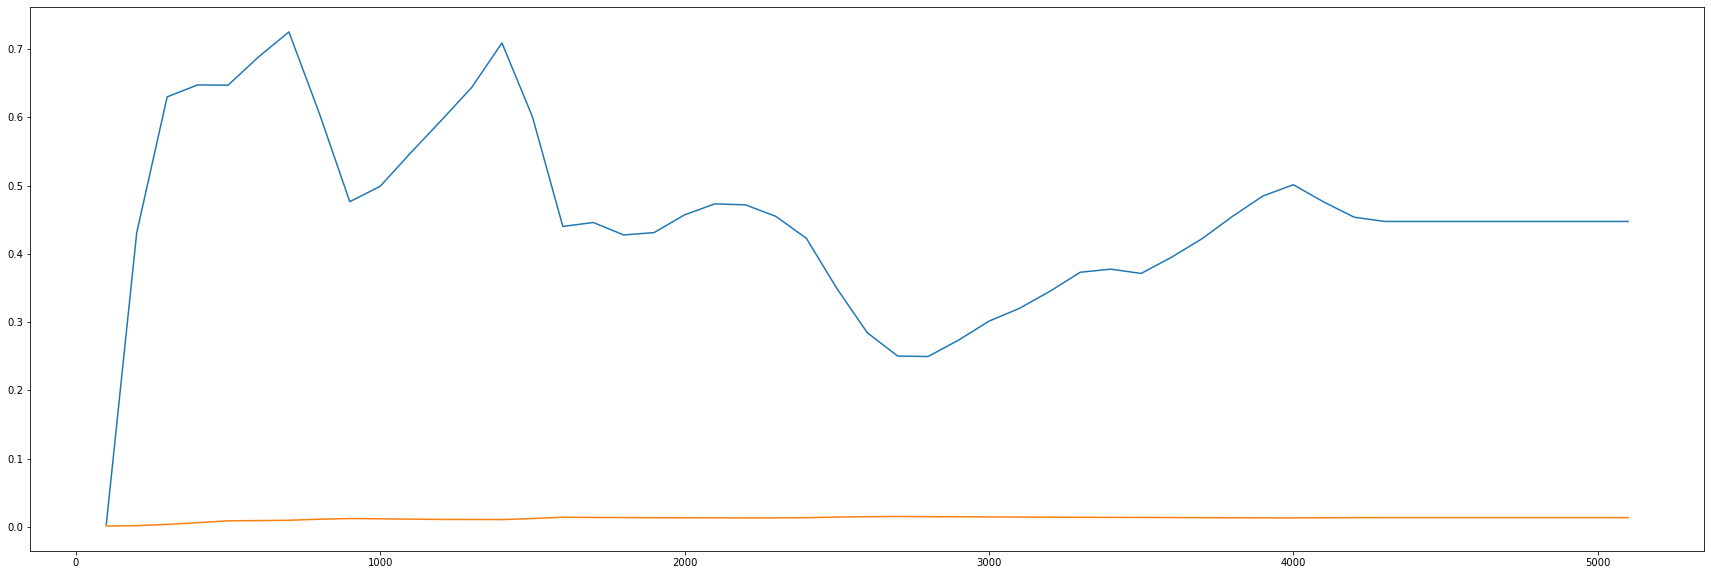

CHFUSD=X
Regression with 100 rows
CHFUSD=X
Regression with 200 rows
CHFUSD=X
Regression with 300 rows
CHFUSD=X
Regression with 400 rows
CHFUSD=X
Regression with 500 rows
CHFUSD=X
Regression with 600 rows
CHFUSD=X
Regression with 700 rows
CHFUSD=X
Regression with 800 rows
CHFUSD=X
Regression with 900 rows
CHFUSD=X
Regression with 1000 rows
CHFUSD=X
Regression with 1100 rows
CHFUSD=X
Regression with 1200 rows
CHFUSD=X
Regression with 1300 rows
CHFUSD=X
Regression with 1400 rows
CHFUSD=X
Regression with 1500 rows
CHFUSD=X
Regression with 1600 rows
CHFUSD=X
Regression with 1700 rows
CHFUSD=X
Regression with 1800 rows
CHFUSD=X
Regression with 1900 rows
CHFUSD=X
Regression with 2000 rows
CHFUSD=X
Regression with 2100 rows
CHFUSD=X
Regression with 2200 rows
CHFUSD=X
Regression with 2300 rows
CHFUSD=X
Regression with 2400 rows
CHFUSD=X
Regression with 2500 rows
CHFUSD=X
Regression with 2600 rows
CHFUSD=X
Regression with 2700 rows
CHFUSD=X
Regression with 2800 rows
CHFUSD=X
Regression with 2900

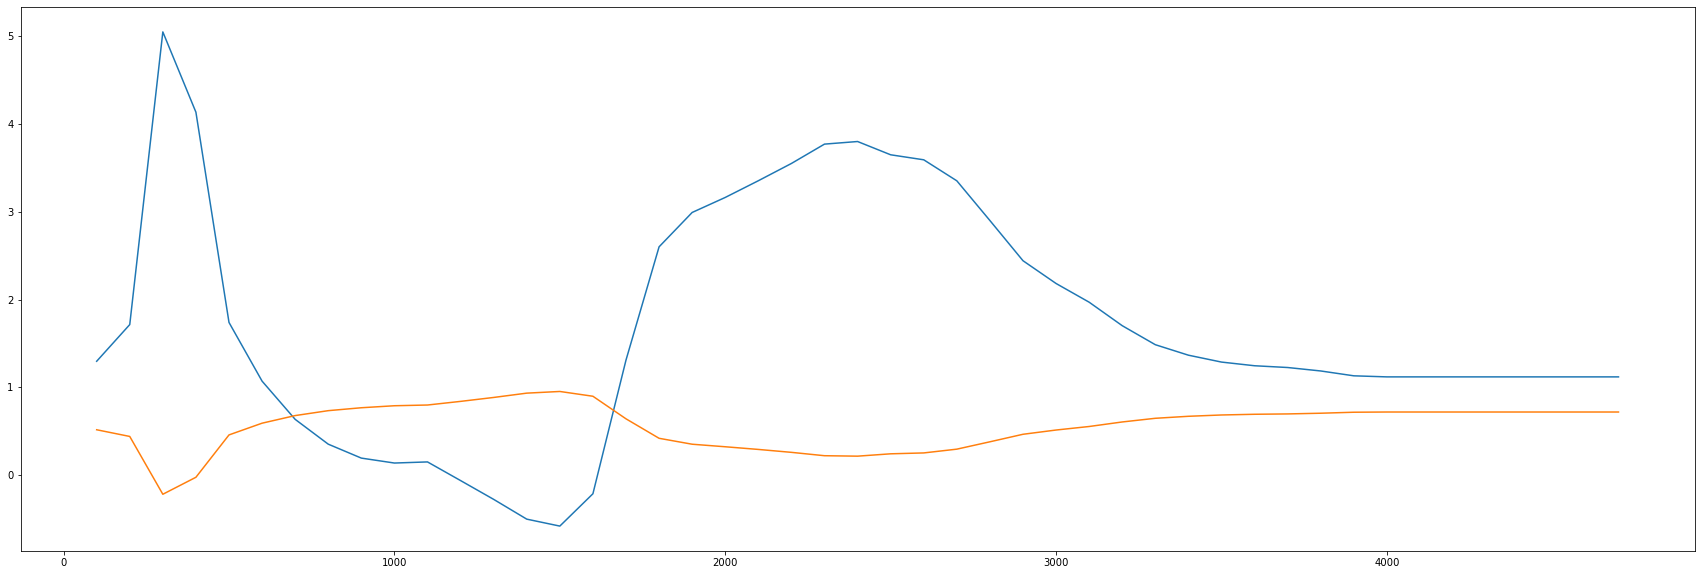

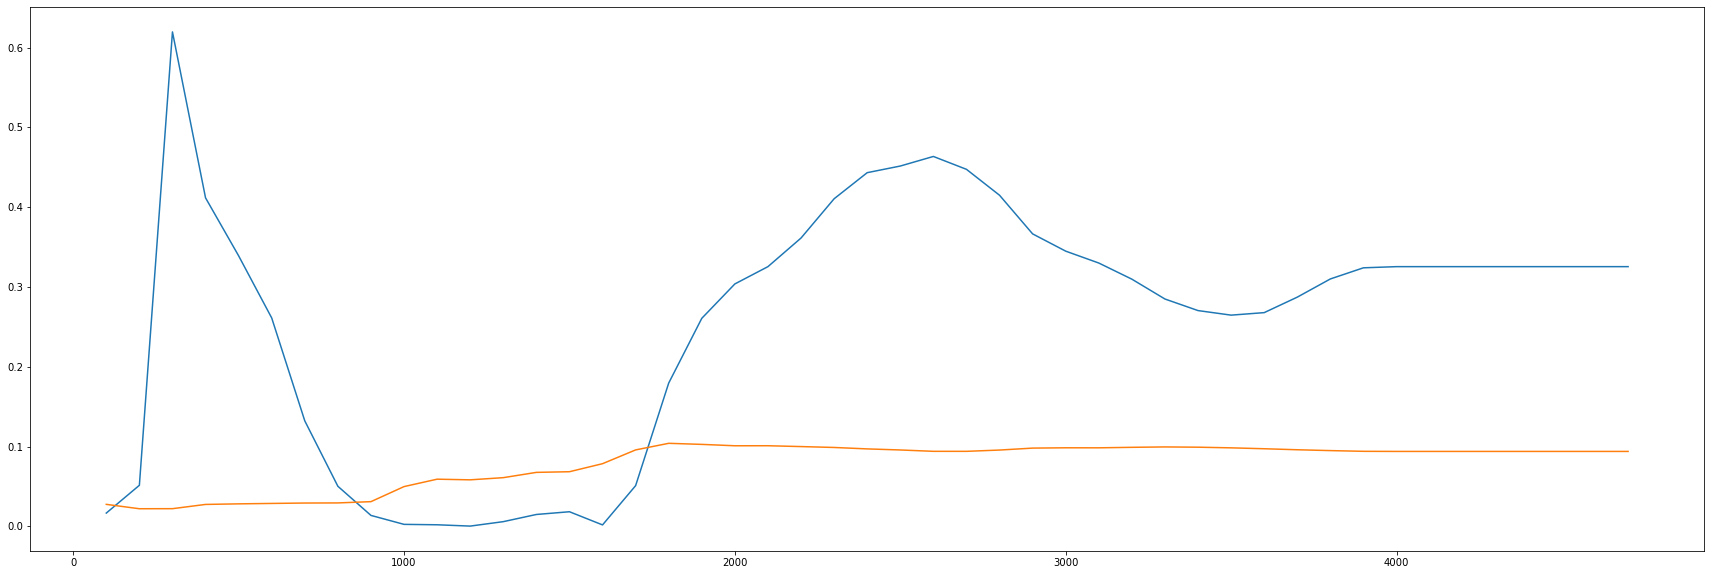

USDBRL=X
Regression with 100 rows
USDBRL=X
Regression with 200 rows
USDBRL=X
Regression with 300 rows
USDBRL=X
Regression with 400 rows
USDBRL=X
Regression with 500 rows
USDBRL=X
Regression with 600 rows
USDBRL=X
Regression with 700 rows
USDBRL=X
Regression with 800 rows
USDBRL=X
Regression with 900 rows
USDBRL=X
Regression with 1000 rows
USDBRL=X
Regression with 1100 rows
USDBRL=X
Regression with 1200 rows
USDBRL=X
Regression with 1300 rows
USDBRL=X
Regression with 1400 rows
USDBRL=X
Regression with 1500 rows
USDBRL=X
Regression with 1600 rows
USDBRL=X
Regression with 1700 rows
USDBRL=X
Regression with 1800 rows
USDBRL=X
Regression with 1900 rows
USDBRL=X
Regression with 2000 rows
USDBRL=X
Regression with 2100 rows
USDBRL=X
Regression with 2200 rows
USDBRL=X
Regression with 2300 rows
USDBRL=X
Regression with 2400 rows
USDBRL=X
Regression with 2500 rows
USDBRL=X
Regression with 2600 rows
USDBRL=X
Regression with 2700 rows
USDBRL=X
Regression with 2800 rows
USDBRL=X
Regression with 2900

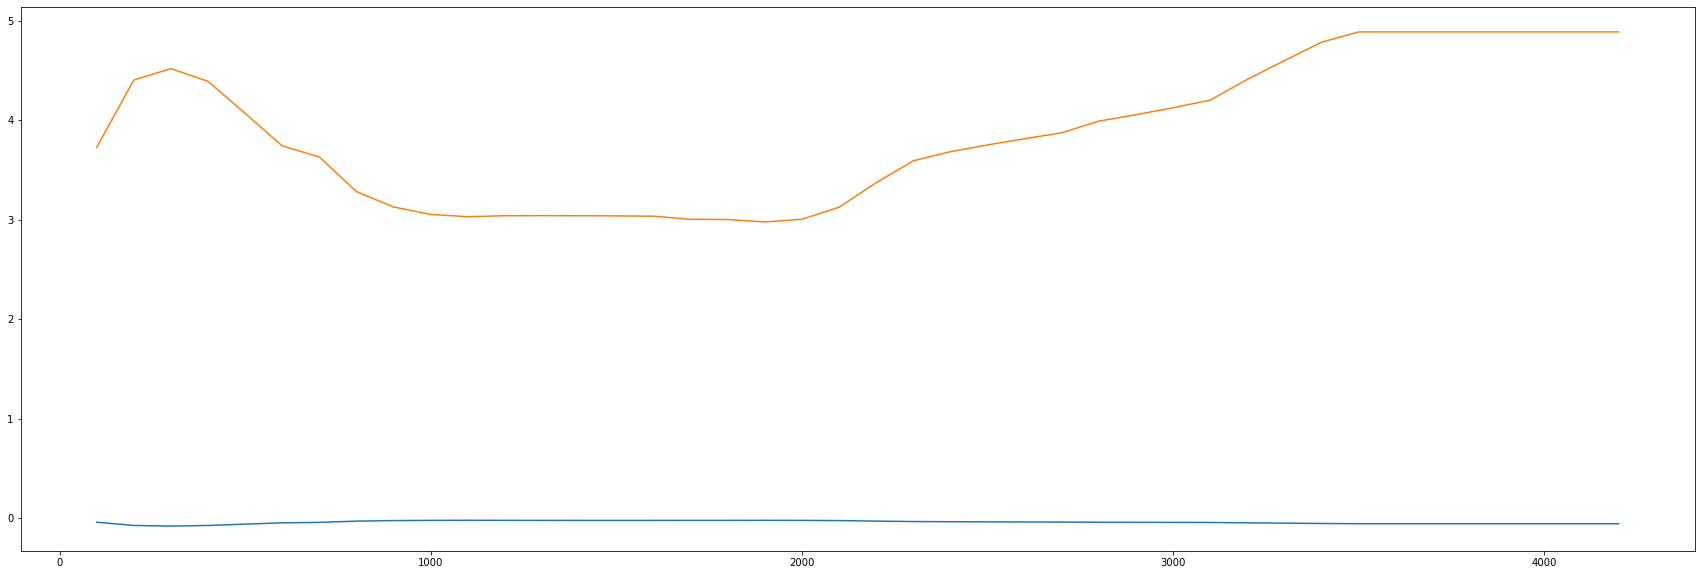

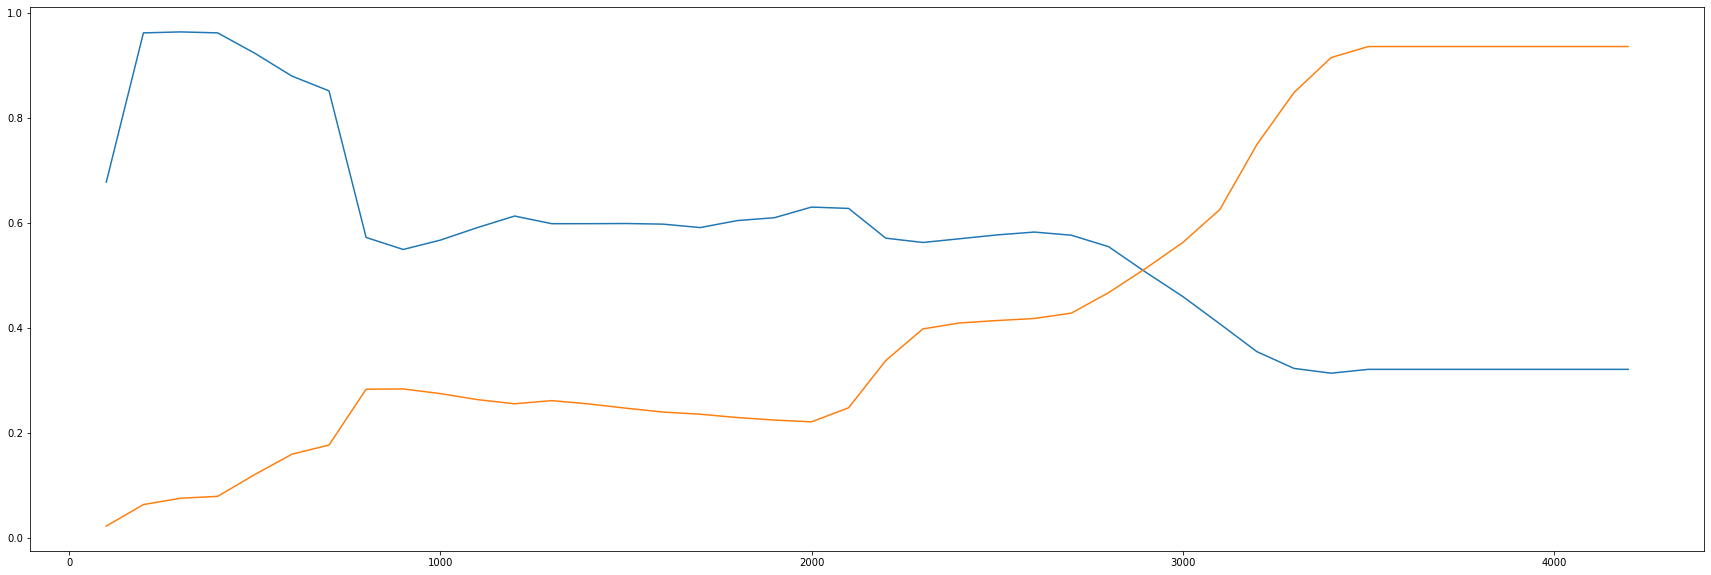

AUDUSD=X
Regression with 100 rows
AUDUSD=X
Regression with 200 rows
AUDUSD=X
Regression with 300 rows
AUDUSD=X
Regression with 400 rows
AUDUSD=X
Regression with 500 rows
AUDUSD=X
Regression with 600 rows
AUDUSD=X
Regression with 700 rows
AUDUSD=X
Regression with 800 rows
AUDUSD=X
Regression with 900 rows
AUDUSD=X
Regression with 1000 rows
AUDUSD=X
Regression with 1100 rows
AUDUSD=X
Regression with 1200 rows
AUDUSD=X
Regression with 1300 rows
AUDUSD=X
Regression with 1400 rows
AUDUSD=X
Regression with 1500 rows
AUDUSD=X
Regression with 1600 rows
AUDUSD=X
Regression with 1700 rows
AUDUSD=X
Regression with 1800 rows
AUDUSD=X
Regression with 1900 rows
AUDUSD=X
Regression with 2000 rows
AUDUSD=X
Regression with 2100 rows
AUDUSD=X
Regression with 2200 rows
AUDUSD=X
Regression with 2300 rows
AUDUSD=X
Regression with 2400 rows
AUDUSD=X
Regression with 2500 rows
AUDUSD=X
Regression with 2600 rows
AUDUSD=X
Regression with 2700 rows
AUDUSD=X
Regression with 2800 rows
AUDUSD=X
Regression with 2900

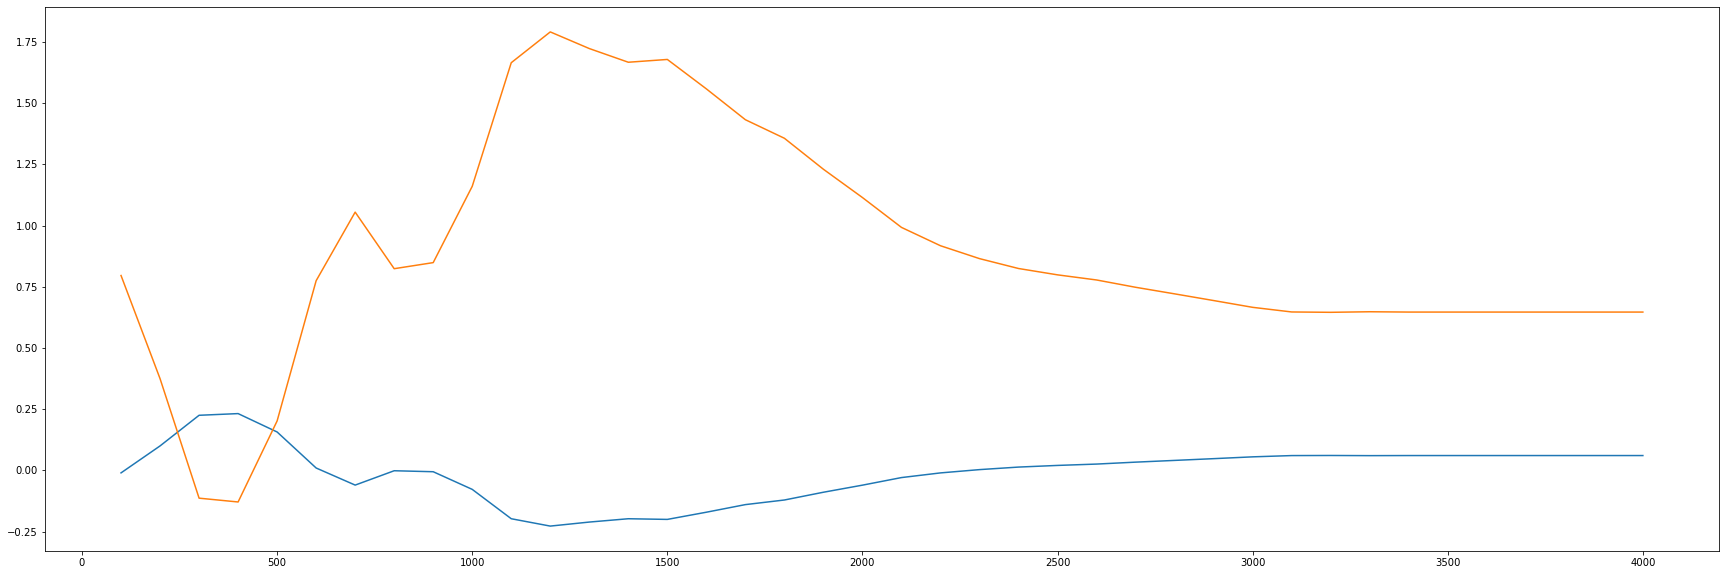

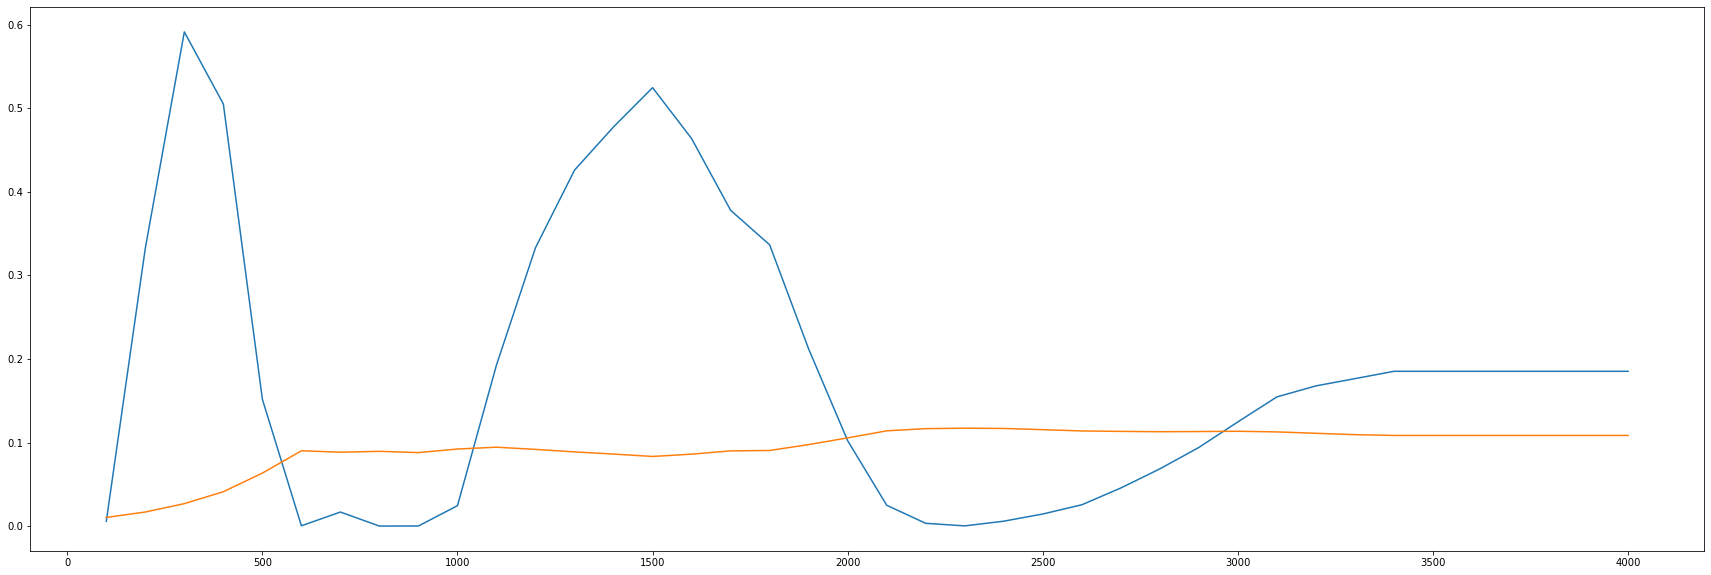

CADUSD=X
Regression with 100 rows
CADUSD=X
Regression with 200 rows
CADUSD=X
Regression with 300 rows
CADUSD=X
Regression with 400 rows
CADUSD=X
Regression with 500 rows
CADUSD=X
Regression with 600 rows
CADUSD=X
Regression with 700 rows
CADUSD=X
Regression with 800 rows
CADUSD=X
Regression with 900 rows
CADUSD=X
Regression with 1000 rows
CADUSD=X
Regression with 1100 rows
CADUSD=X
Regression with 1200 rows
CADUSD=X
Regression with 1300 rows
CADUSD=X
Regression with 1400 rows
CADUSD=X
Regression with 1500 rows
CADUSD=X
Regression with 1600 rows
CADUSD=X
Regression with 1700 rows
CADUSD=X
Regression with 1800 rows
CADUSD=X
Regression with 1900 rows
CADUSD=X
Regression with 2000 rows
CADUSD=X
Regression with 2100 rows
CADUSD=X
Regression with 2200 rows
CADUSD=X
Regression with 2300 rows
CADUSD=X
Regression with 2400 rows
CADUSD=X
Regression with 2500 rows
CADUSD=X
Regression with 2600 rows
CADUSD=X
Regression with 2700 rows
CADUSD=X
Regression with 2800 rows
CADUSD=X
Regression with 2900

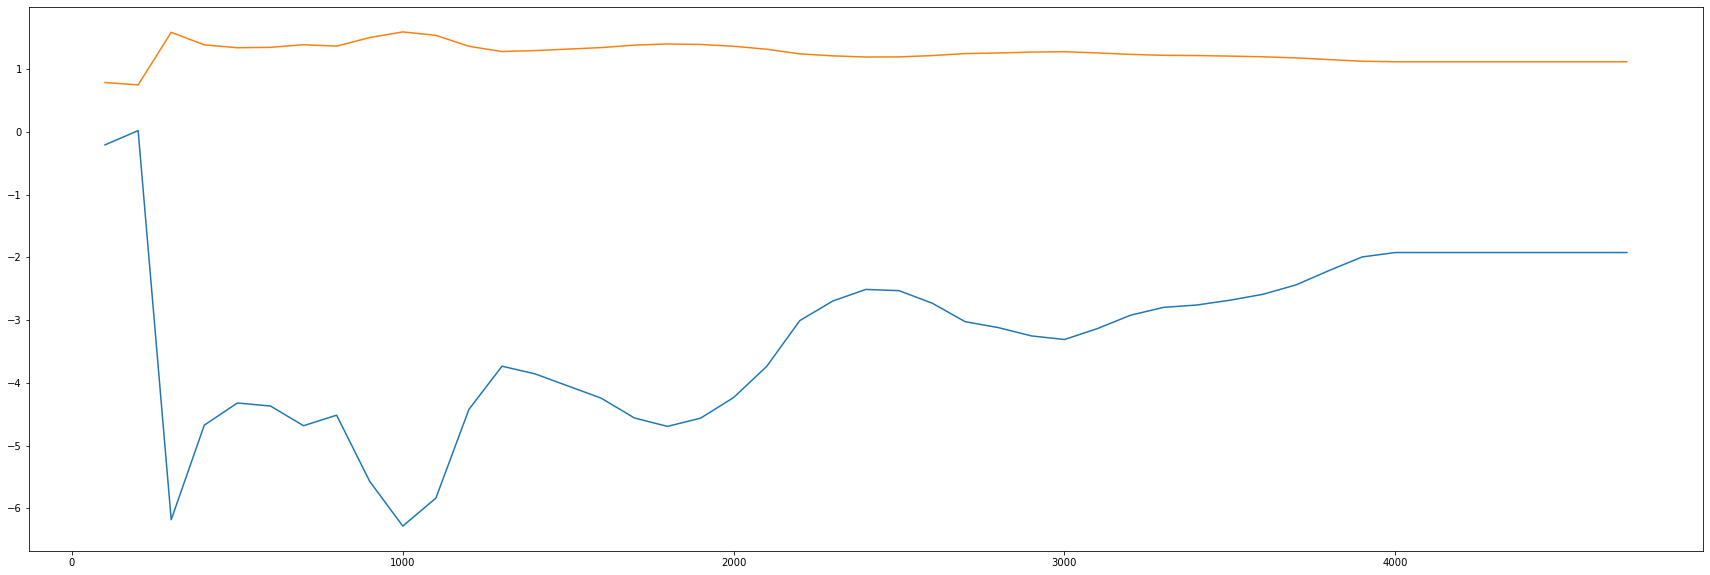

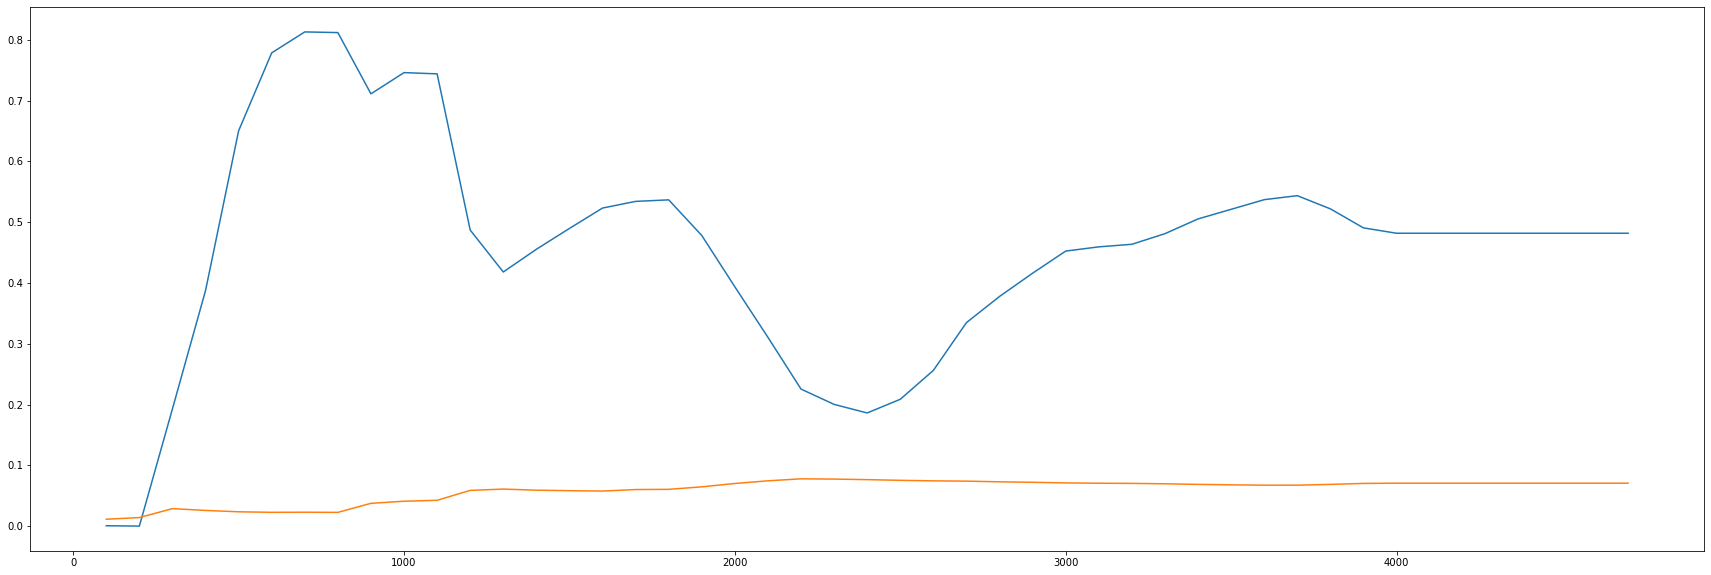

In [208]:
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"] = (30,10)

for i in range(len(ForexSymbols)):
    print(ForexSymbols[i])
    coefs = []
    intercepts = []
    scores = []
    RMSE = []
    for j in range(100,len(ForexDF[i]),100):
        print("Regression with " + str(j) + " rows")
        try:
            print(ForexSymbols[i])
            #créer un objet reg lin
            modeleReg=LinearRegression()

            #créer y et X

            y=ForexDF[i]
            X=EquityDF[i].dropna()
            idx = X.index.intersection(y.index)
            X = X.loc[idx].head(j)
            y = y.loc[idx].head(j)
            X=X.values.reshape(-1,1)

            modeleReg.fit(X,y)
            intercepts.append(modeleReg.intercept_)
            coefs.append(modeleReg.coef_[0])
            scores.append(modeleReg.score(X,y))
            RMSE.append(np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))) 

            #calcul du R²
            #print(modeleReg.score(X,y))
        except: pass
    if len(list(range(100,len(ForexDF[i]),100))) == len(coefs) == len(intercepts):
        plt.plot(list(range(100,len(ForexDF[i]),100)),coefs)
        plt.plot(list(range(100,len(ForexDF[i]),100)),intercepts)
        plt.show()
        plt.plot(list(range(100,len(ForexDF[i]),100)),scores)
        plt.plot(list(range(100,len(ForexDF[i]),100)),RMSE)
        plt.show()





## Lagging Correlation

In [216]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

## Regression Logistique 

In [581]:
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"] = (30,15)

for i in range(len(ForexSymbols)):
    try:
        print("Paire modélisée : " + ForexSymbols[i])
        #créer un objet reg lin
        modeleReg = LogisticRegression(solver='liblinear', C=0.01, multi_class='ovr',random_state=0)
    
        #créer y et X 
        
        #Input Variables
        X = pd.DataFrame(index=EquityDF[i].index.intersection(BondDF[i].index))
        X["Equity Ratio"]=EquityDF[i].loc[EquityDF[i].index.intersection(BondDF[i].index)]
        X["Yield Ratio"]=BondDF[i].loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index))].replace([np.inf, -np.inf], np.nan).dropna(axis=0)
        X["WTI"] = WTI.dropna(axis=0).loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index))]
        X["Gold"] =  Gold.dropna(axis=0).loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index.intersection(Gold.index)))]
        X["Brent"] =  Brent.dropna(axis=0).loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index.intersection(Gold.index)))]
        X=X.dropna()
        
        print("Nombre d'échantillons : "+str(len(X)))
        
        #Output Variable
        y=ForexDF[i].pct_change().dropna()
        y=y>0
        
        
        idx = X.index.intersection(y.index)
        X = X.shift(1).dropna()
        y = y.loc[X.index.intersection(y.index)]
        X = X.loc[X.index.intersection(y.index)].values
        
        x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

        modeleReg.fit(x_train,y_train)
        
        print("Valeur de l'intercept : " + str(modeleReg.intercept_))
        print("Coefficients de la regression : " + str(modeleReg.coef_))

        #calcul du R²
        print("Score R-carré de la regression : " + str(modeleReg.score(x_train, y_train)))
        print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(modeleReg.score(x_test, y_test)))
        
        confusion_matrix = confusion_matrix(y_test, y_pred)
        print(confusion_matrix)
      

        
    except: pass

Paire modélisée : GBPJPY=X
Nombre d'échantillons : 3269
Valeur de l'intercept : [-0.02414475]
Coefficients de la regression : [[-4.51776377e-03 -2.01818069e-04  9.89386593e-04 -6.38341027e-05
   9.89386593e-04]]
Score R-carré de la regression : 0.5157578789394698
Accuracy of logistic regression classifier on test set: 0.50
Paire modélisée : GBPUSD=X
Nombre d'échantillons : 7331
Valeur de l'intercept : [-0.00978758]
Coefficients de la regression : [[-0.00195166 -0.01952911  0.00203333 -0.00025638  0.00203333]]
Score R-carré de la regression : 0.514379622021364
Accuracy of logistic regression classifier on test set: 0.50
Paire modélisée : EURUSD=X
Nombre d'échantillons : 7073
Valeur de l'intercept : [-0.038072]
Coefficients de la regression : [[ 1.41796224e-02  4.20029948e-02  5.03751850e-04 -9.36290213e-05
   5.03751850e-04]]
Score R-carré de la regression : 0.5153321976149915
Accuracy of logistic regression classifier on test set: 0.51
Paire modélisée : JPYUSD=X
Nombre d'échantillons :

#### Résultats avant l'ajout du Brent:
<p>
Paire modélisée : GBPJPY=X
Nombre d'échantillons : 3269
Valeur de l'intercept : [-0.02635962]
Coefficients de la regression : [[-4.96845949e-03 -2.01523436e-04  1.99168371e-03 -6.27137215e-05]]
Score R-carré de la regression : 0.5157578789394698
Accuracy of logistic regression classifier on test set: 0.50
</p>
<p>
Paire modélisée : GBPUSD=X
Nombre d'échantillons : 7331
Valeur de l'intercept : [-0.0100327]
Coefficients de la regression : [[-0.00161581 -0.02006799  0.0040594  -0.00025638]]
Score R-carré de la regression : 0.514379622021364
Accuracy of logistic regression classifier on test set: 0.50
</p>
<p>
Paire modélisée : EURUSD=X
Nombre d'échantillons : 7073
Valeur de l'intercept : [-0.03884409]
Coefficients de la regression : [[ 1.44397565e-02  4.14443543e-02  1.01342680e-03 -9.41155392e-05]]
Score R-carré de la regression : 0.5161839863713799
Accuracy of logistic regression classifier on test set: 0.51
</p>
<p>
Paire modélisée : JPYUSD=X
Nombre d'échantillons : 3288
Valeur de l'intercept : [-0.05277758]
Coefficients de la regression : [[-2.63461663e-03  9.62128028e-03 -5.44964914e-05 -1.36275018e-05]]
Score R-carré de la regression : 0.5204590818363274
Accuracy of logistic regression classifier on test set: 0.50
</p>
<p>
Paire modélisée : CADUSD=X
Nombre d'échantillons : 0
</p>
<p>
Paire modélisée : SEKUSD=X
Nombre d'échantillons : 7081
Valeur de l'intercept : [-0.00415275]
Coefficients de la regression : [[-2.92266110e-03  5.57925249e-02 -2.24494696e-03  8.09704918e-05]]
Score R-carré de la regression : 0.525096525096525
Accuracy of logistic regression classifier on test set: 0.53
<p>
</p>
Paire modélisée : CHFUSD=X
Nombre d'échantillons : 6142
Valeur de l'intercept : [-0.05391735]
Coefficients de la regression : [[-0.01478888  0.05428978  0.00196293 -0.00012231]]
Score R-carré de la regression : 0.5074121135112241
Accuracy of logistic regression classifier on test set: 0.51
</p>
<p>
Paire modélisée : USDBRL=X
Nombre d'échantillons : 2765
Valeur de l'intercept : [-0.02036249]
Coefficients de la regression : [[-7.81206879e-03 -7.38561189e-03  3.14623763e-03  3.55488586e-05]]
Score R-carré de la regression : 0.5255041518386714
Accuracy of logistic regression classifier on test set: 0.52
</p><p>
Paire modélisée : AUDUSD=X
Nombre d'échantillons : 6626
Valeur de l'intercept : [0.00146912]
Coefficients de la regression : [[ 0.09730893  0.08132277 -0.00265431 -0.00013466]]
Score R-carré de la regression : 0.514383227693808
Accuracy of logistic regression classifier on test set: 0.50</p><p>
Paire modélisée : CADUSD=X
Nombre d'échantillons : 6319
Valeur de l'intercept : [0.01628879]
Coefficients de la regression : [[-0.00305203  0.02270726  0.00415575 -0.00023667]]
Score R-carré de la regression : 0.5321923390383048
Accuracy of logistic regression classifier on test set: 0.50</p>

In [569]:
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"] = (30,15)

for i in range(len(ForexSymbols)):
    try:
        print("Paire modélisée : " + ForexSymbols[i] + " ("+str(i)+")")
        #créer un objet reg lin
        modeleReg = LogisticRegression(solver='liblinear', C=0.01, multi_class='ovr',random_state=0)
    
        #créer y et X
        idx = EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index.intersection(Gold.index)))
        X = pd.DataFrame(index=idx)
        X["Equity Ratio"]=EquityDF[i].loc[idx]
        X["Yield Ratio"]=BondDF[i].loc[idx]
        X["WTI"] = WTI.loc[idx]
        X["Gold"] =  Gold.loc[idx]
        y=ForexDF[i].pct_change().dropna()
        y=y>0
        X=X.replace([np.inf, -np.inf], np.nan)
        print("Nombre d'échantillons : "+str(len(X)))
        idx = X.index.intersection(y.index)
        X = X.shift(1).dropna()
        y = y.loc[X.index.intersection(y.index)]
        X = X.loc[X.index.intersection(y.index)].values
        
        x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

        modeleReg.fit(x_train,y_train)
        
        print("Valeur de l'intercept : " + str(modeleReg.intercept_))
        print("Coefficients de la regression : " + str(modeleReg.coef_))

        #calcul du R²
        print("Score R-carré de la regression : " + str(modeleReg.score(x_train, y_train)))

        print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(modeleReg.score(x_test, y_test)))
        
        #confusion_matrix = confusion_matrix(y_test, y_pred)
        #print(confusion_matrix)
        
    except: pass

Paire modélisée : GBPJPY=X (0)
Nombre d'échantillons : 7527
Valeur de l'intercept : [-0.03544359]
Coefficients de la regression : [[-2.64128362e-03 -1.13791077e-03  1.03134910e-03  1.73002206e-05]]
Score R-carré de la regression : 0.5132433783108445
Accuracy of logistic regression classifier on test set: 0.49
Paire modélisée : GBPUSD=X (1)
Nombre d'échantillons : 7560
Valeur de l'intercept : [-0.01103886]
Coefficients de la regression : [[ 0.00195954 -0.02127106  0.00306319 -0.00018913]]
Score R-carré de la regression : 0.5154130702836005
Accuracy of logistic regression classifier on test set: 0.48
Paire modélisée : EURUSD=X (2)
Nombre d'échantillons : 7560
Valeur de l'intercept : [-0.03814069]
Coefficients de la regression : [[ 0.0136509   0.0444335   0.0021524  -0.00017939]]
Score R-carré de la regression : 0.5257556406981694
Accuracy of logistic regression classifier on test set: 0.50
Paire modélisée : JPYUSD=X (3)
Nombre d'échantillons : 7516
Valeur de l'intercept : [-0.06776233]
C

## Les paires ayant la meilleure prediction avec un jour d'avance :

<li>USD/BRL</li>
<li>CHF/USD</li>
<li>SEK/USD</li>
<li>CAD/USD</li>

In [578]:
modeleReg.predict_proba(np.array([[1.54448363e-01, 7.22886029e-01, 4.61400000e+01, 1.19040000e+03]]))

array([[0.51443478, 0.48556522]])

### Best lagging shift

In [584]:
plt.rcParams["figure.figsize"] = (30,15)
CorrMeans = []
for lag in range(200):
    r = []
    for i in range(len(ForexSymbols)):
        try:
            #créer un objet reg lin
            modeleReg = LogisticRegression(solver='liblinear', C=0.01, multi_class='ovr',random_state=0)

            #créer y et X
            X = pd.DataFrame(index=EquityDF[i].index.intersection(BondDF[i].index))
            X["Equity Ratio"]=EquityDF[i].loc[EquityDF[i].index.intersection(BondDF[i].index)]
            X["Yield Ratio"]=BondDF[i].loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index))].replace([np.inf, -np.inf], np.nan).dropna(axis=0)
            X["WTI"] = WTI.dropna(axis=0).loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index))]
            X["Gold"] =  Gold.dropna(axis=0).loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index.intersection(Gold.index)))]
            
            y=ForexDF[i].pct_change().dropna()
            y=y>0
            X=X.dropna()
            idx = X.index.intersection(y.index)
            X = X.shift(lag).dropna()

            y = y.loc[X.index.intersection(y.index)]
            X = X.loc[X.index.intersection(y.index)].values

            x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

            modeleReg.fit(x_train,y_train)


            r.append(modeleReg.score(x_test, y_test))
        except: pass
    CorrMeans.append(sum(r)/len(r))
    

In [585]:
print("Les lags enregistrants les plus hauts scores moyens : ")
heapq.nlargest(3, range(len(CorrMeans)), CorrMeans.__getitem__)

Les lags enregistrants les plus hauts scores moyens : 


[89, 79, 65]

## Backtesting

In [ ]:
        i=6
        print("Paire modélisée : " + ForexSymbols[i] + " ("+str(i)+")")
        #créer un objet reg lin
        modeleReg = LogisticRegression(solver='liblinear', C=0.01, multi_class='ovr',random_state=0)
    
        #créer y et X
        X = pd.DataFrame(index=EquityDF[i].index.intersection(BondDF[i].index))
        X["Equity Ratio"]=EquityDF[i].loc[EquityDF[i].index.intersection(BondDF[i].index)]
        X["Yield Ratio"]=BondDF[i].loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index))].replace([np.inf, -np.inf], np.nan).dropna(axis=0)
        X["WTI"] = WTI.dropna(axis=0).loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index))]
        X["Gold"] =  Gold.dropna(axis=0).loc[EquityDF[i].index.intersection(BondDF[i].index.intersection(WTI.index.intersection(Gold.index)))]
        y=y>0
        X=X.dropna()
        print("Nombre d'échantillons : "+str(len(X)))
        idx = X.index.intersection(y.index)
        X = X.shift(1).dropna()
        print(X)
        y = y.loc[X.index.intersection(y.index)]
        X = X.loc[X.index.intersection(y.index)].values
        
        x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

        modeleReg.fit(x_train,y_train)
        
        print("Valeur de l'intercept : " + str(modeleReg.intercept_))
        print("Coefficients de la regression : " + str(modeleReg.coef_))

        #calcul du R²
        print("Score R-carré de la regression : " + str(modeleReg.score(x_train, y_train)))
        
        start_b = datetime.datetime(2021, 1, 1)
        end_b = datetime.datetime(2022, 1, 27)
        
        BacktestPair = web.DataReader(symbol, "yahoo", start_b, end_b)
        for index,row in BacktestPair.iterrows():
            Gold = investpy.search_quotes(text="Gold",n_results=1).retrieve_historical_data(from_date=str((index + datetime.timedelta(days=-1)).strftime("%d/%m/%Y")), to_date=str(index.strftime("%d/%m/%Y")))["Close"].dropna(axis=0)
            print(Gold)


In [257]:
#Recupération des yields via les csv issus d'investing (Meilleure méthode en partie I.)

BondCSV = []
BondDF = []
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:

    if f != ".DS_Store" and f != "EquityBondRatio.ipynb":
        print(f)
        temp_b = pd.read_csv(f,index_col="Date")["Price"].dropna()
        temp_b.index = pd.to_datetime(temp_b.index)
        temp_b = temp_b.iloc[::-1]
        
        BondCSV.append(temp_b)
        
        
idx = BondCSV[0].index.intersection(BondCSV[1].index)
BondDF.append(BondCSV[0].loc[idx]/BondCSV[1].loc[idx])
idx = BondCSV[0].index.intersection(BondCSV[-1].index)
BondDF.append(BondCSV[0].loc[idx]/BondCSV[-1].loc[idx])
idx = BondCSV[4].index.intersection(BondCSV[-1].index)
BondDF.append(BondCSV[4].loc[idx]/BondCSV[-1].loc[idx])
idx = BondCSV[1].index.intersection(BondCSV[-1].index)
BondDF.append(BondCSV[1].loc[idx]/BondCSV[-1].loc[idx])
idx = BondCSV[3].index.intersection(BondCSV[-1].index)
BondDF.append(BondCSV[3].loc[idx]/BondCSV[-1].loc[idx])
idx = BondCSV[0].index.intersection(BondCSV[0].index)
BondDF.append(BondCSV[0].loc[idx]/BondCSV[0].loc[idx])
idx = BondCSV[-2].index.intersection(BondCSV[-1].index)
BondDF.append(BondCSV[-2].loc[idx]/BondCSV[-1].loc[idx])
idx = BondCSV[-1].index.intersection(BondCSV[5].index)
BondDF.append(BondCSV[-1].loc[idx]/BondCSV[5].loc[idx])
idx = BondCSV[2].index.intersection(BondCSV[-1].index)
BondDF.append(BondCSV[2].loc[idx]/BondCSV[-1].loc[idx])
idx = BondCSV[3].index.intersection(BondCSV[-1].index)
BondDF.append(BondCSV[3].loc[idx]/BondCSV[-1].loc[idx])
        

UK.csv
Japan.csv
AUD.csv
CAD.csv
EUR.csv
Brazil.csv
CHF.csv
US.csv
